# Homework part 2

### Preparation

In [1]:
import pandas as pd
import numpy as np
import os
import sys
import time

In [2]:
from recursion import recursive_action
from recursion import check_visits
from recursion import count_visits
from recursion import last_visit
from recursion_2 import last_week_visits
from recursion_2 import number_of_letters
from functions import check_file_path
from functions import check_dir_path
from functions import print_data_frame

In [3]:
project_path = os.path.dirname(os.path.realpath('__file__'))
input_path = project_path + '\\input'
processed_path = project_path + '\\processed'
output_path = project_path + '\\output'

dir_paths = [
    input_path,
    processed_path,
    output_path,
]

recursive_action(iter(dir_paths), check_dir_path)
        
costs_path = input_path + '\\Costs.csv'
orders_path = input_path + '\\Orders.csv'
relations_path = input_path + '\\Relations.csv'
users_path = input_path + '\\Users.csv'
visits_path = input_path + '\\Visits.csv'

file_paths = [
    costs_path, 
    orders_path,
    relations_path,
    users_path, 
    visits_path,
]


recursive_action(iter(file_paths), check_file_path)

print('All files were successfully found!')

All files were successfully found!


In [4]:
Costs = pd.read_csv(costs_path)
Costs.__name = 'Costs'
Orders =  pd.read_csv(orders_path)
Orders.__name = 'Orders'
Relations =  pd.read_csv(relations_path)
Relations.__name = 'Relations'
Users =  pd.read_csv(users_path)
Users.__name = 'Users'
Visits = pd.read_csv(visits_path, nrows = 1000)
Visits.__name = 'Visits'
print('Files: \n Costs.csv \n Orders.csv \n Relations.csv \n Users.csv \n Visits.csv (partially)\nwere loaded')

C:\Users\mchau\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Files: 
 Costs.csv 
 Orders.csv 
 Relations.csv 
 Users.csv 
 Visits.csv (partially)
were loaded


In [5]:
Costs['date_created'] = pd.to_datetime(Costs['date_created'])
Users['Reg_date'] = pd.to_datetime(Users['Reg_date'])
Orders['Order Date'] = pd.to_datetime(Orders['Order Date'])

Orders['Order Date'] = Orders['Order Date'].dt.floor('d')
Costs['date_created'] = Costs['date_created'].dt.floor('d')
Users['Reg_date'] = Users['Reg_date'].dt.floor('d')

## Task 2
### Revenue

In [6]:
cols = ['id_user','Order Date']
order_max = Orders[cols].groupby('id_user', as_index = False).max()

In [7]:
order_period = pd.merge(Users, order_max, how='right', left_on = 'id', right_on = 'id_user')
order_period = order_period.assign(period=lambda x: x['Order Date'] - x.Reg_date)
order_period.head()

,id,Reg_date,id_partner,name,id_user,Order Date,period
0,7254798,2017-11-14,tf_usa_desk,%7Bcampaign.id%7D,7254798,2017-11-14,0 days
1,7217878,2017-11-12,tf_usa_mob,%7Bcampaign.id%7D,7217878,2017-12-26,44 days
2,5043120,2017-06-25,ADC_mobile,05b6fd5aee3e7e9249eb9eb994d6e949,5043120,2017-08-27,63 days
3,4830509,2017-06-15,W4_mobile,100019,4830509,2017-08-06,52 days
4,7149422,2017-11-06,W4_non_adult_valid,100084,7149422,2017-11-06,0 days


In [8]:
order_period = pd.merge(order_period, Relations, how='outer', on=['name', 'id_partner'])
order_period = order_period[['period', 'chanel']]
order_period.head()

,period,chanel
0,0 days,TF VB
1,44 days,TF VB Mob
2,63 days,ADC
3,52 days,W4_mobile
4,0 days,W4


In [9]:
order_period.period =(order_period.period.fillna(0)/ np.timedelta64(1, 'D')).astype(int)
order_period.head()

,period,chanel
0,0,TF VB
1,44,TF VB Mob
2,63,ADC
3,52,W4_mobile
4,0,W4


In [10]:
order_period = order_period.groupby('chanel', as_index = False).mean()
display(order_period.head())

revenue_lifetime_path =  output_path + '\\revenue_lifetime.csv'
order_period.to_csv(revenue_lifetime_path)

,chanel,period
0,10,9.783505
1,13,27.000000
2,14,0.000000
3,15,21.166667
4,29,6.651429


# Task 3

In [11]:
current_date =  pd.Period('2017-12-20').to_timestamp()
finish_date = pd.Period('2018-01-20').to_timestamp()

Solving problem
<dr>
See number_of_letters function from recursion_2

In [12]:
week_letters = number_of_letters(current_date, finish_date, Orders, Users, visits_path)

day 2018-01-20 00:00:00,  prcess time 249.03301215171814
day 2018-01-19 00:00:00,  prcess time 182.85283994674683
day 2018-01-18 00:00:00,  prcess time 181.07289028167725
day 2018-01-17 00:00:00,  prcess time 205.23923540115356
day 2018-01-16 00:00:00,  prcess time 170.28115892410278
day 2018-01-15 00:00:00,  prcess time 171.35401678085327
day 2018-01-14 00:00:00,  prcess time 210.8550477027893
day 2018-01-13 00:00:00,  prcess time 173.81821250915527
day 2018-01-12 00:00:00,  prcess time 170.1459891796112
day 2018-01-11 00:00:00,  prcess time 181.79790830612183
day 2018-01-10 00:00:00,  prcess time 187.28614234924316
day 2018-01-09 00:00:00,  prcess time 168.18328166007996
day 2018-01-08 00:00:00,  prcess time 170.13525533676147
day 2018-01-07 00:00:00,  prcess time 207.85986757278442
day 2018-01-06 00:00:00,  prcess time 180.0775866508484
day 2018-01-05 00:00:00,  prcess time 171.5459566116333
day 2018-01-04 00:00:00,  prcess time 169.23186111450195
day 2018-01-03 00:00:00,  prcess ti

Saving intermediate result

In [13]:
display(week_letters.head())
week_letters_path = processed_path + '\\week_letters.csv'
week_letters.to_csv(week_letters_path)

,id,Reg_date,id_partner,name,week_3,week_2,week_1,week_52,week_51
0,6745955,2017-10-04,rt_DBM,${INSERTION_ORDER_ID},30.0,35.0,35.0,35.0,25.0
1,5159878,2017-07-01,DBM,%24%7BINSERTION_ORDER_ID%7D,30.0,35.0,35.0,35.0,25.0
2,5159881,2017-07-01,DBM,%24%7BINSERTION_ORDER_ID%7D,30.0,35.0,35.0,35.0,25.0
3,5159940,2017-07-01,DBM,%24%7BINSERTION_ORDER_ID%7D,30.0,35.0,35.0,35.0,25.0
4,5295496,2017-07-08,DBM,%24%7BINSERTION_ORDER_ID%7D,30.0,35.0,35.0,35.0,25.0


In [14]:
week_letters = pd.merge(week_letters, Relations, how = 'outer', on=['name', 'id_partner'])
del week_letters['id']
del week_letters['Reg_date']
del week_letters['id_partner']
del week_letters['name']

In [15]:
week_letters = week_letters.groupby('chanel', as_index=False).sum()
week_letters.head()

,chanel,week_3,week_2,week_1,week_52,week_51
0,10,240924.0,281076.0,280963.0,275991.0,189967.0
1,13,1782.0,2079.0,2079.0,2079.0,1485.0
2,14,270.0,315.0,315.0,315.0,225.0
3,15,11658.0,13597.0,13597.0,13594.0,9710.0
4,29,219059.0,255575.0,255568.0,255528.0,182492.0


Recursive function for plotting

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

def print_plot(chanels, week_letters, n):
    if n == 0:
        week_letters.iloc[n].plot(kind="bar", title=chanels.iloc[n])
        plt.show()
    else:
        print_plot(chanels, week_letters, n - 1)
        week_letters.iloc[n].plot(kind="bar", title=chanels.iloc[n])
        plt.show()

Reverse weeks for chronoligical order

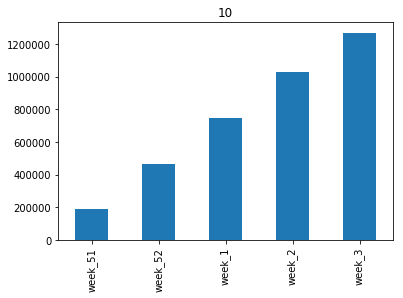

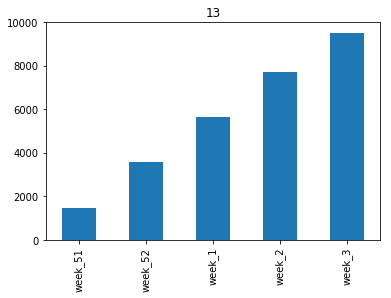

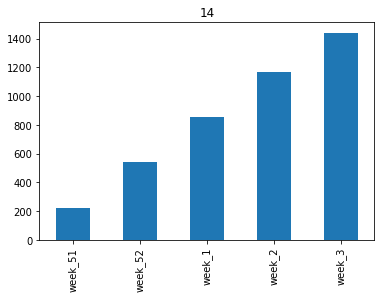

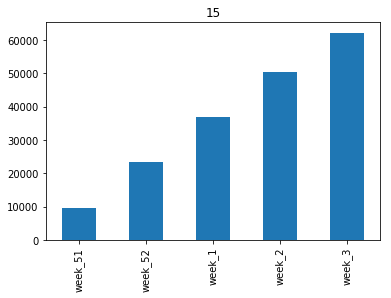

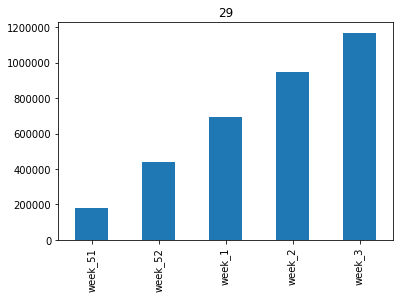

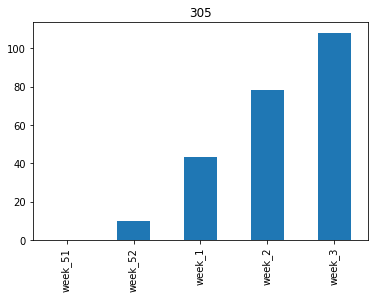

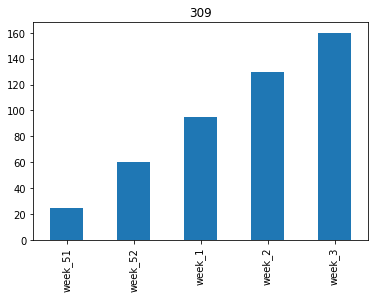

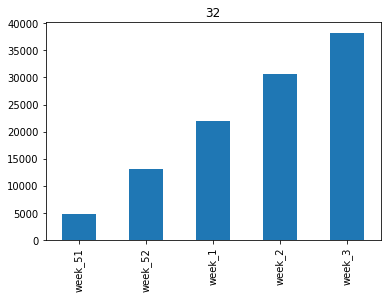

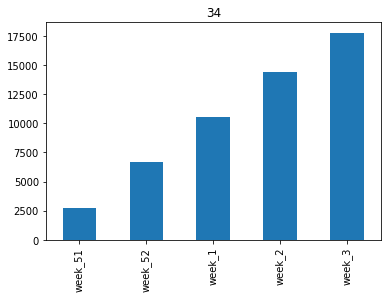

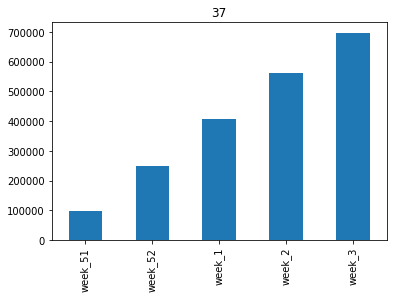

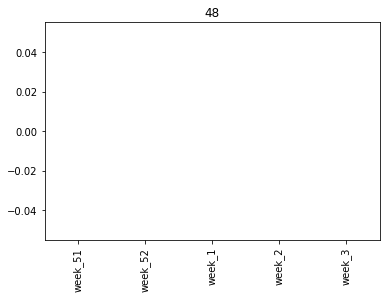

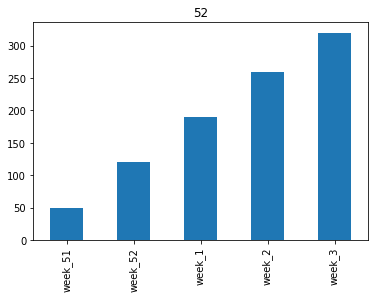

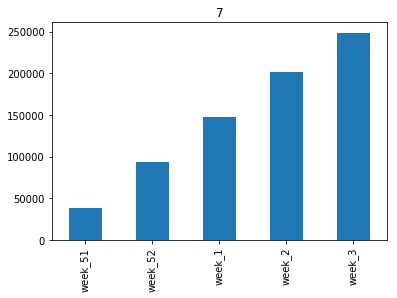

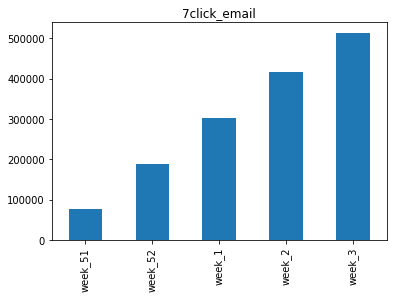

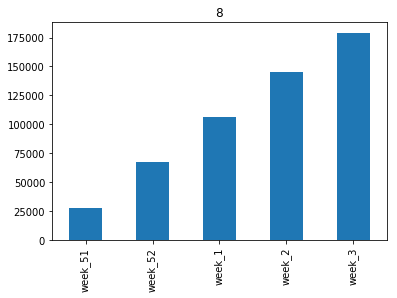

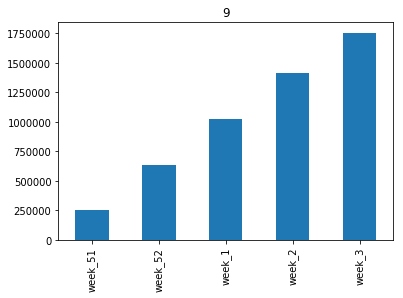

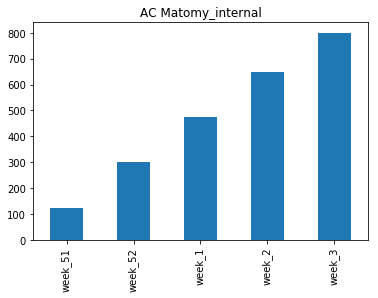

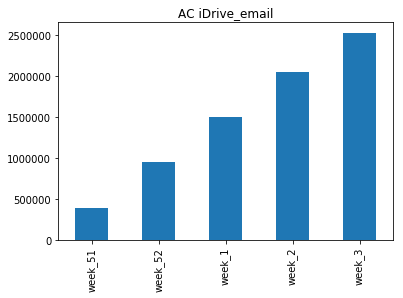

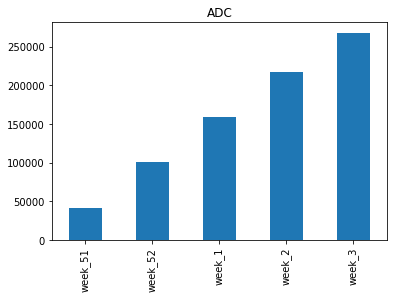

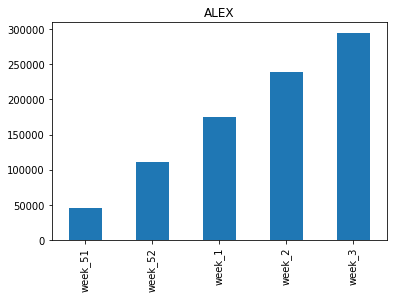

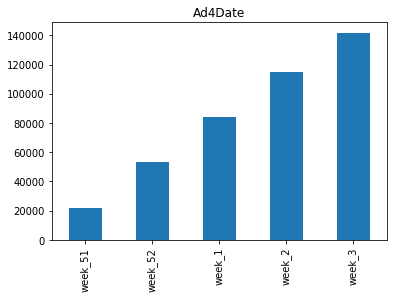

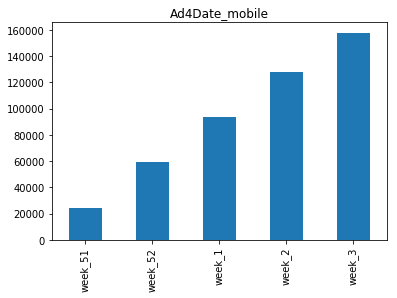

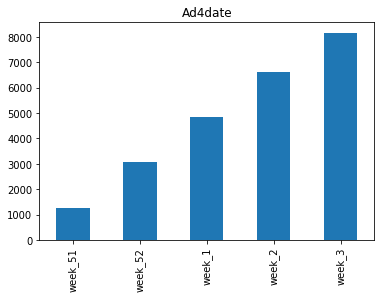

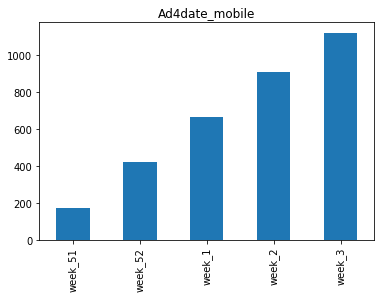

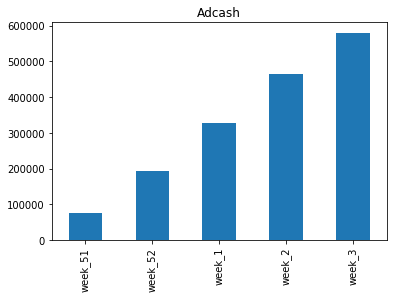

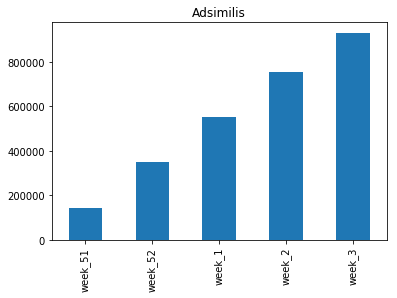

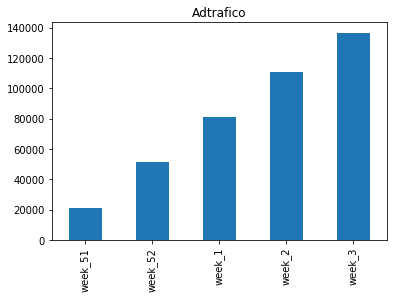

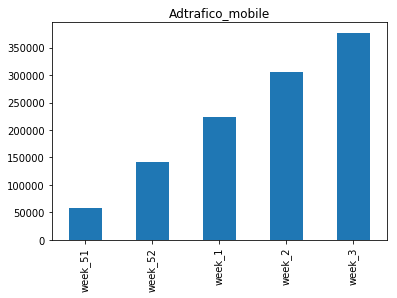

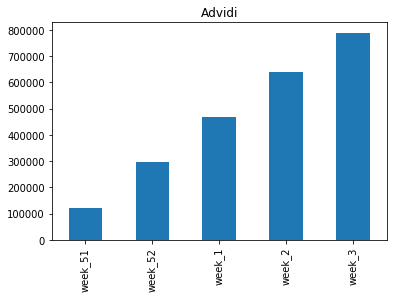

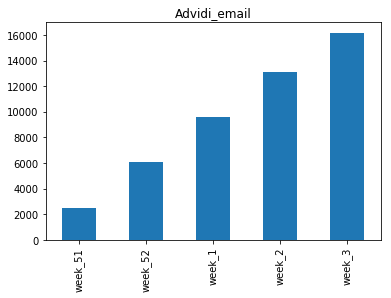

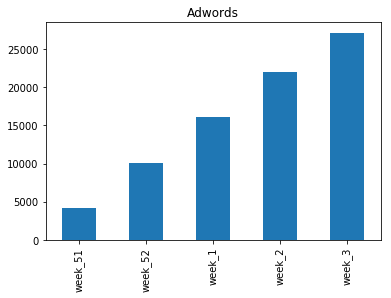

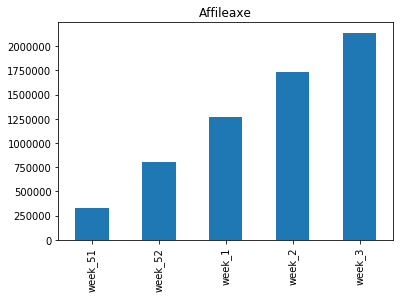

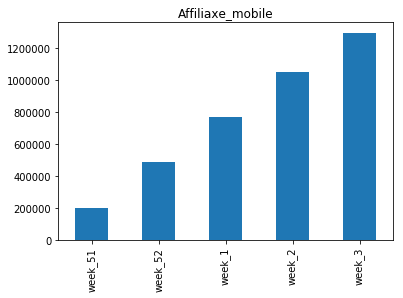

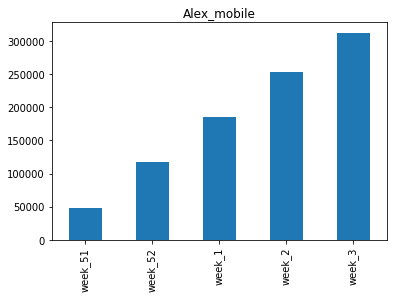

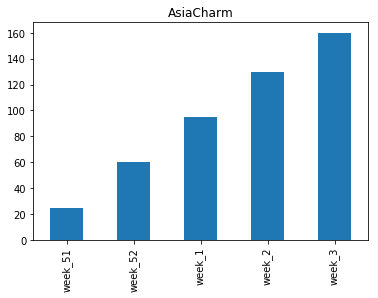

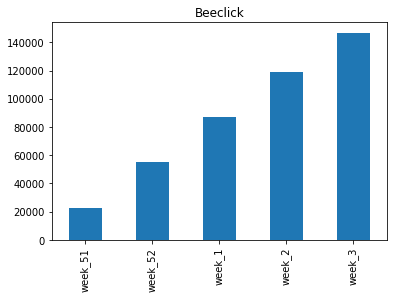

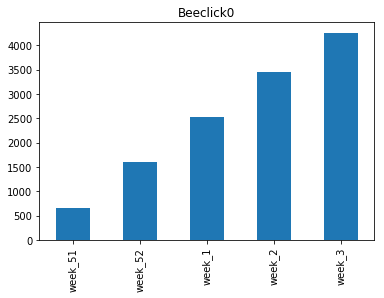

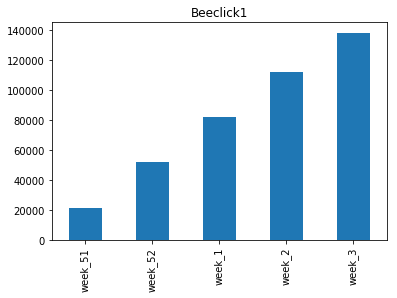

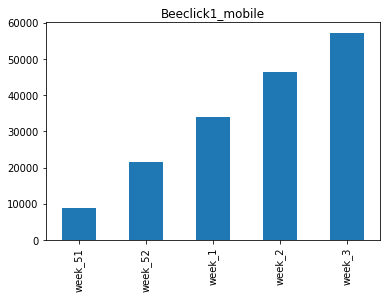

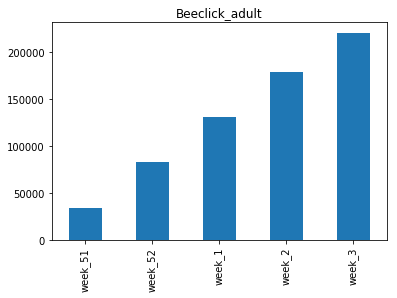

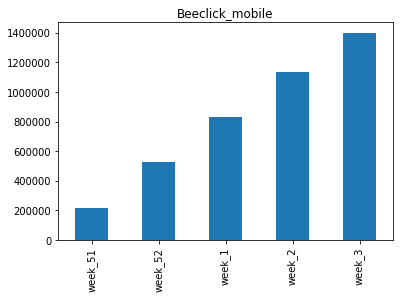

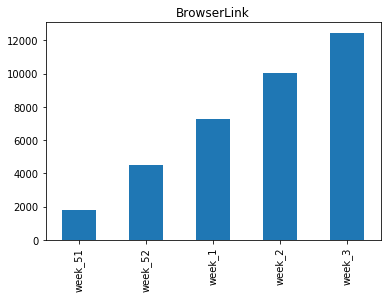

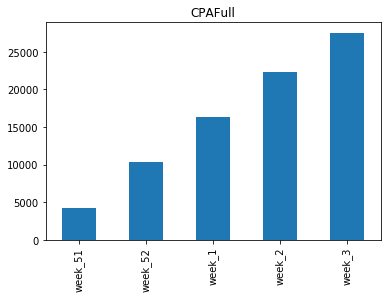

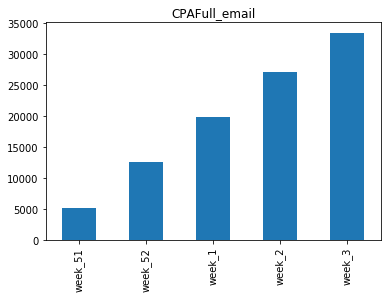

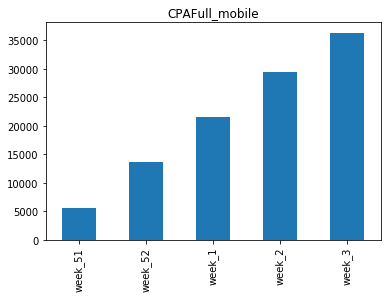

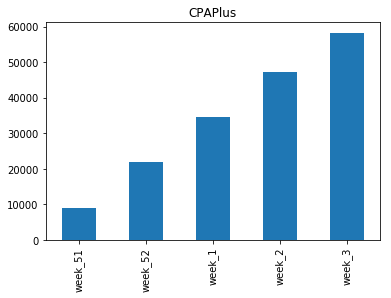

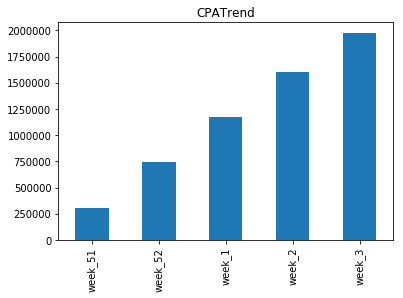

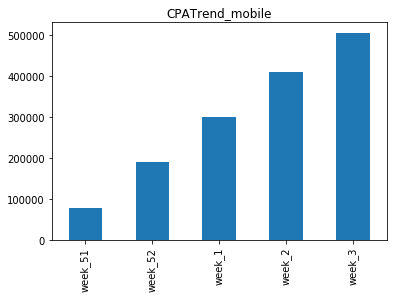

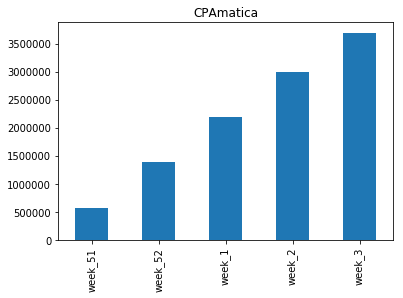

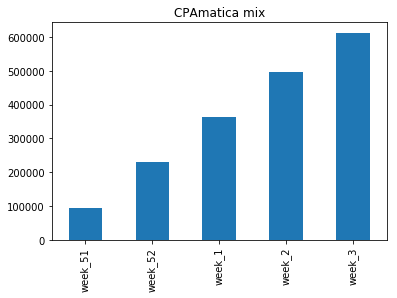

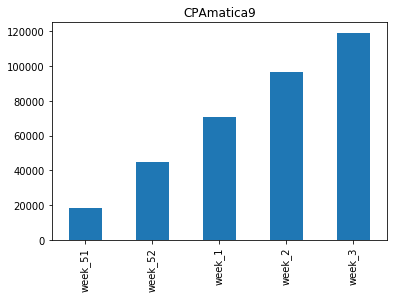

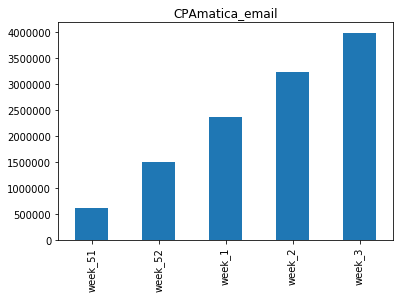

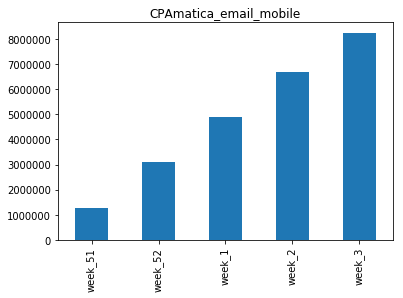

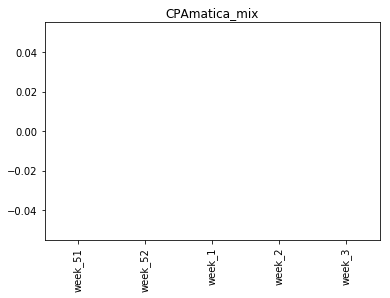

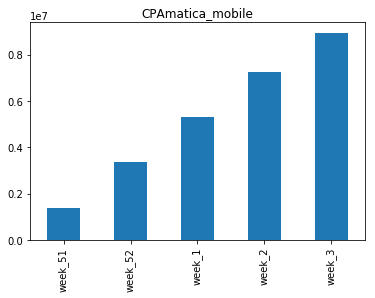

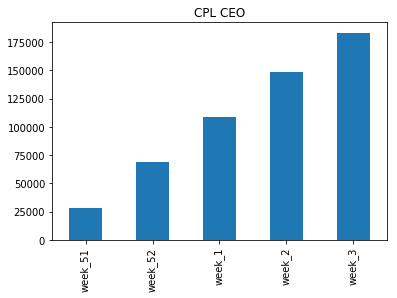

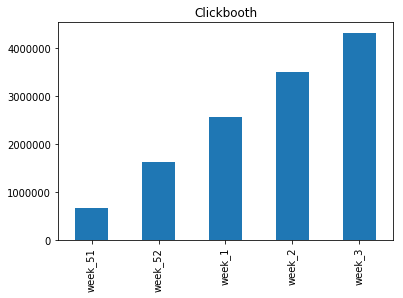

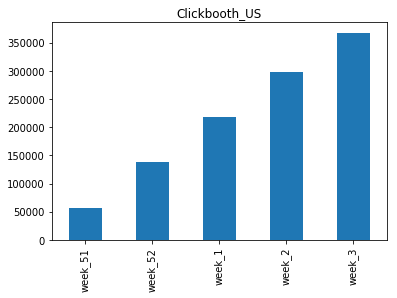

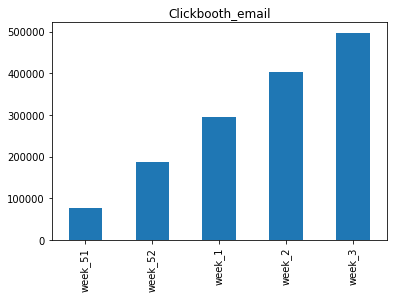

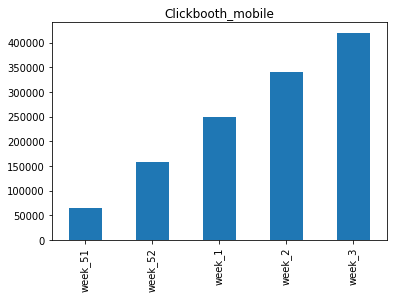

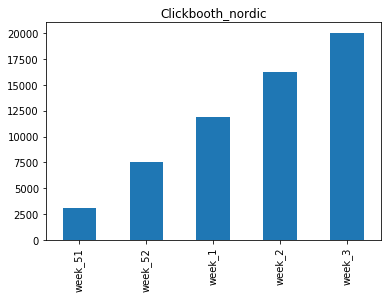

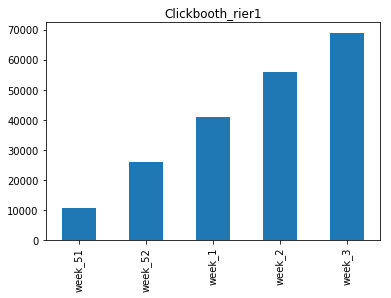

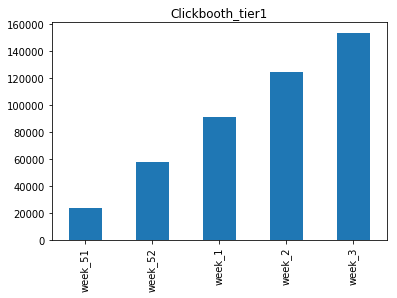

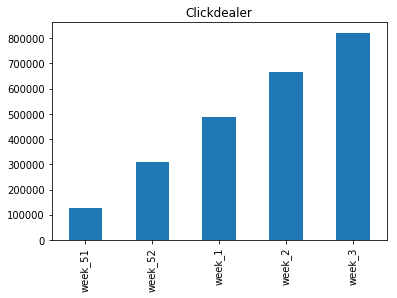

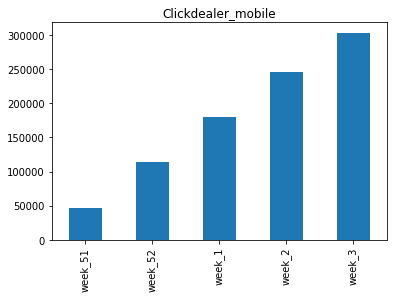

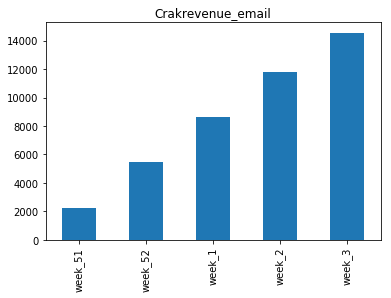

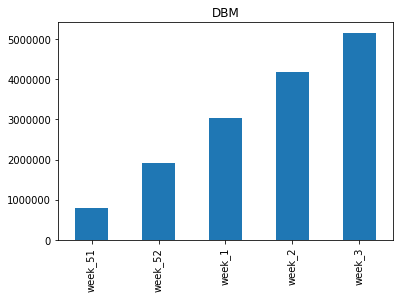

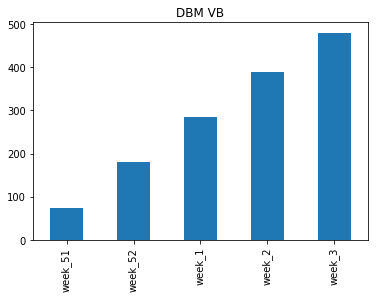

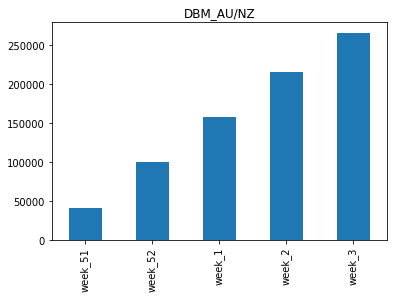

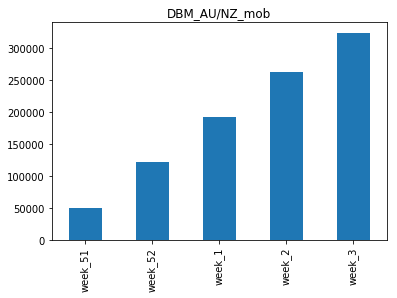

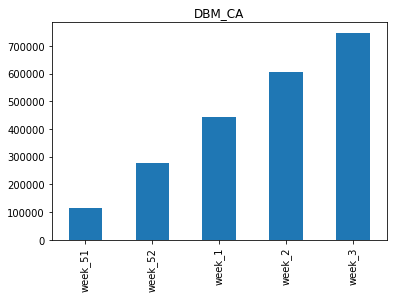

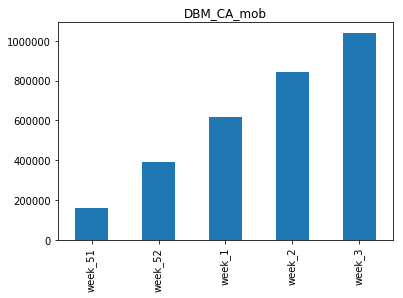

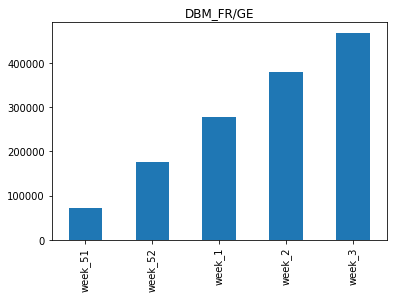

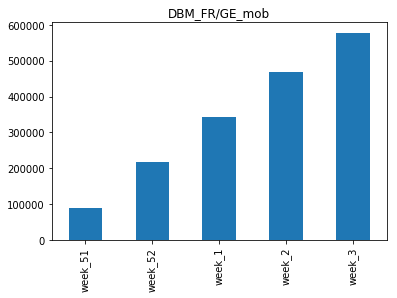

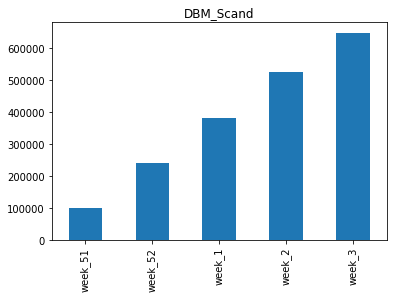

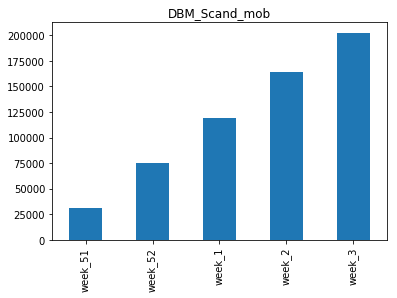

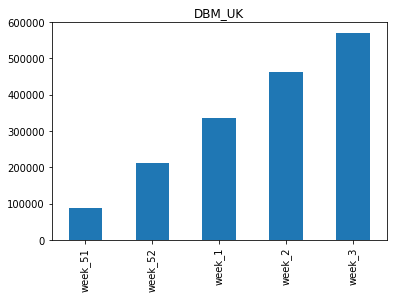

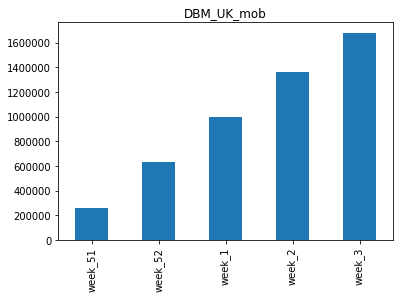

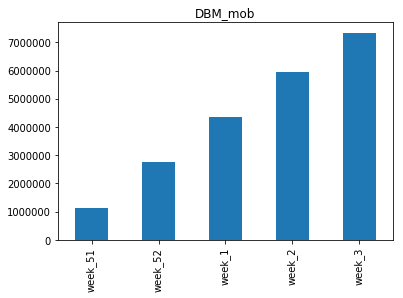

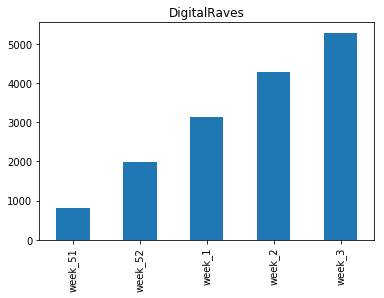

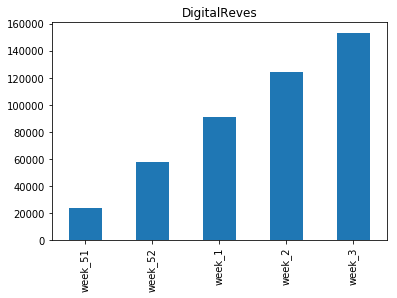

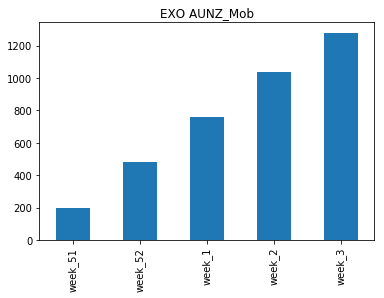

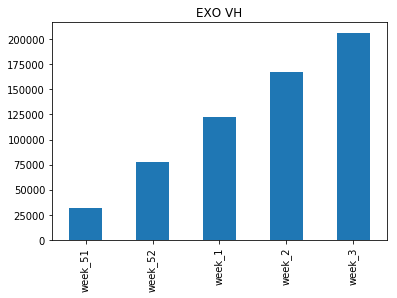

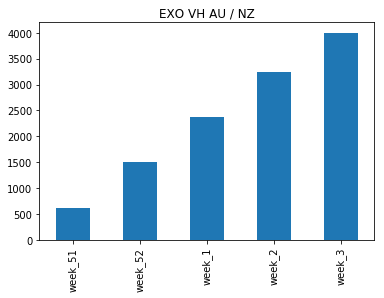

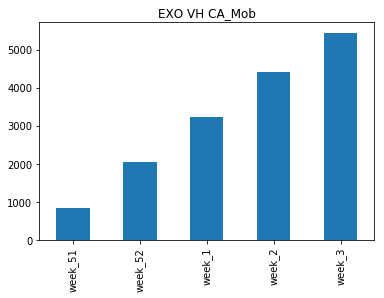

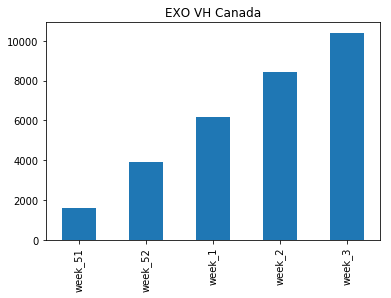

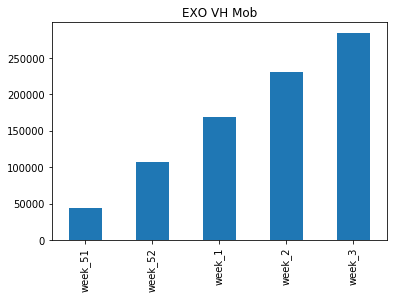

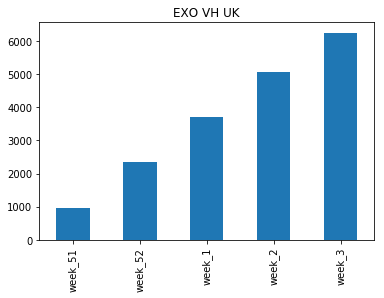

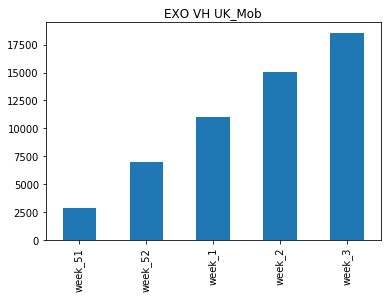

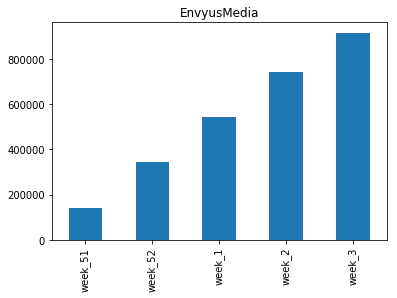

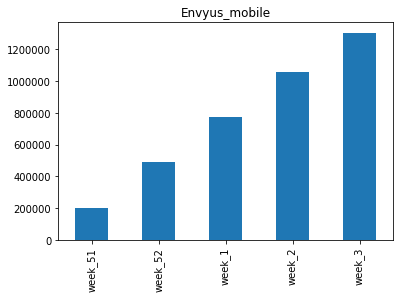

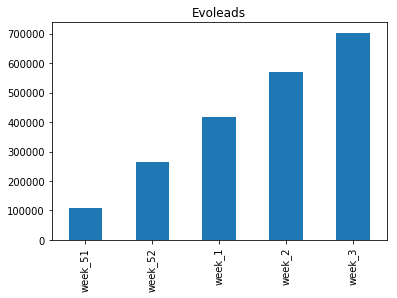

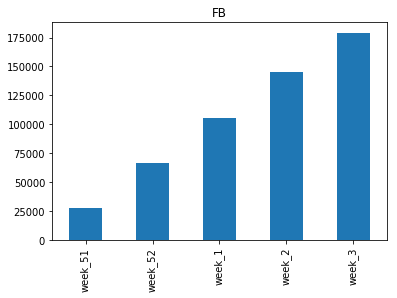

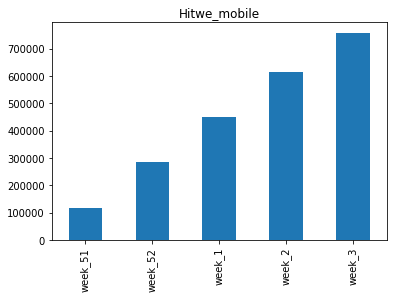

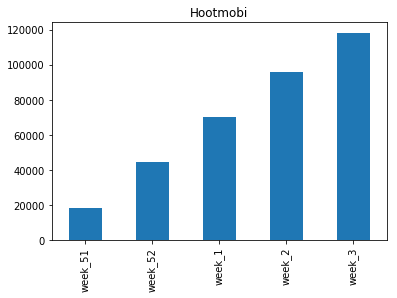

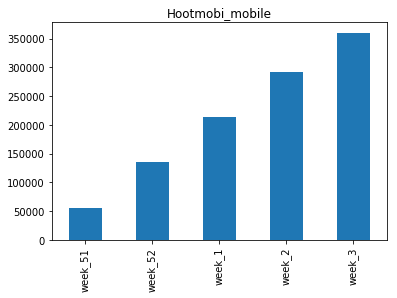

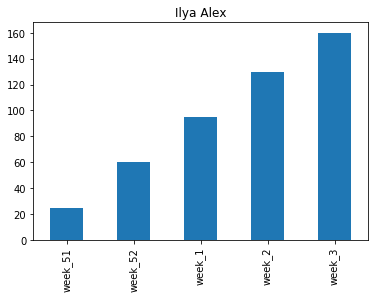

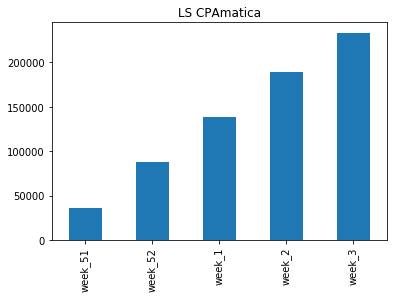

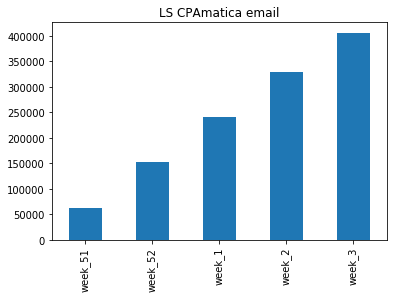

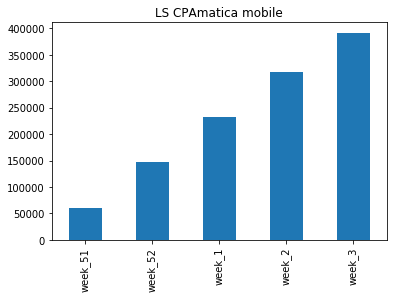

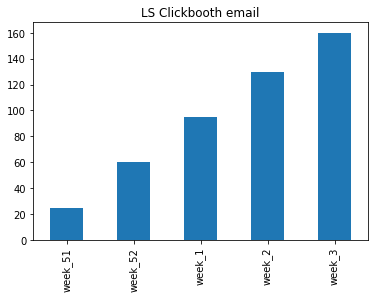

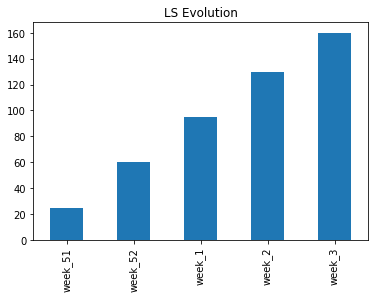

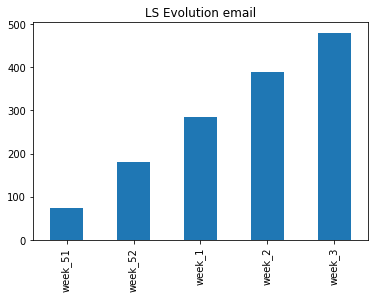

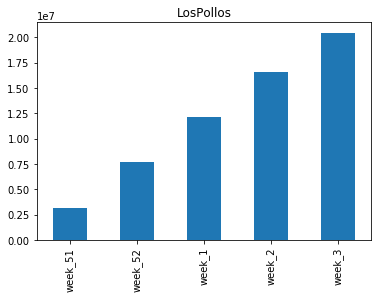

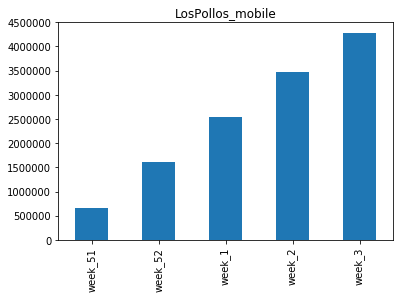

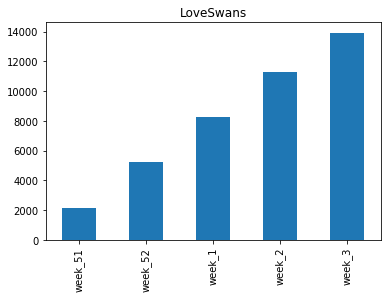

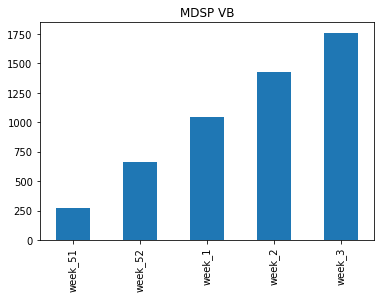

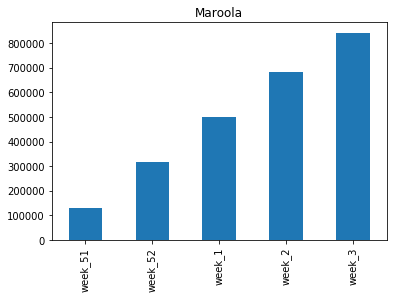

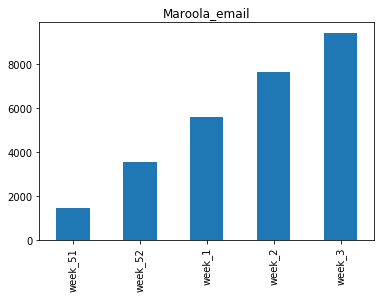

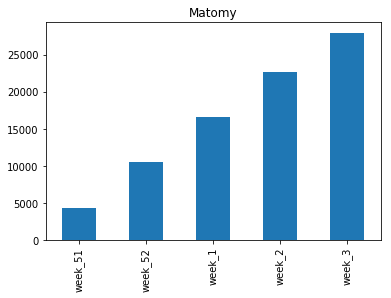

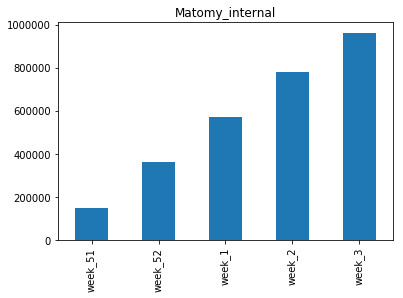

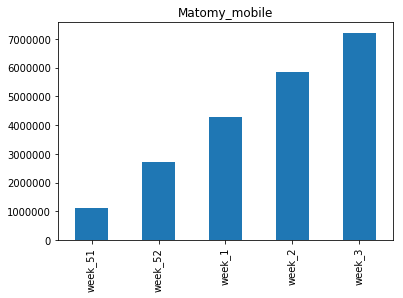

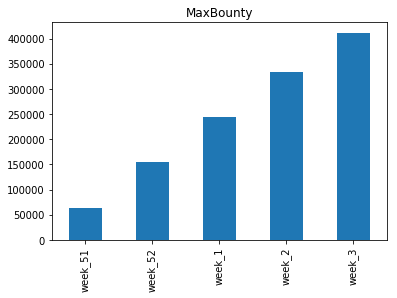

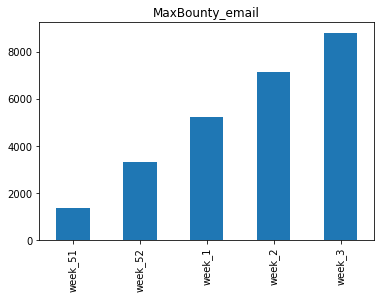

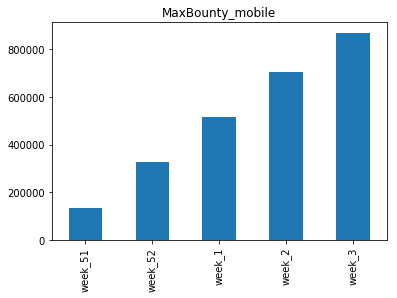

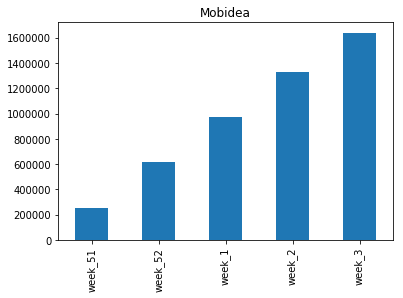

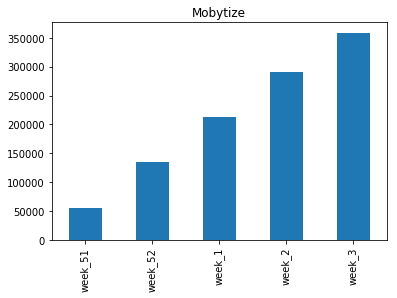

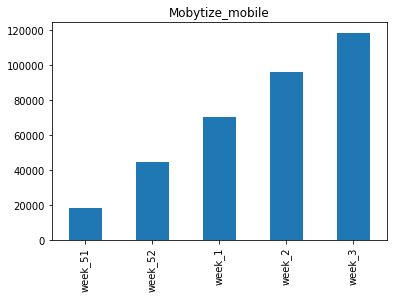

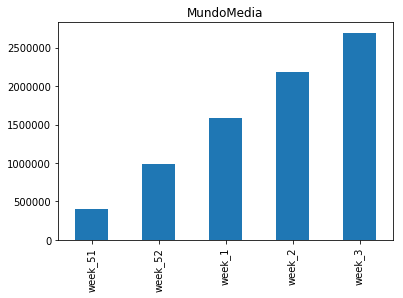

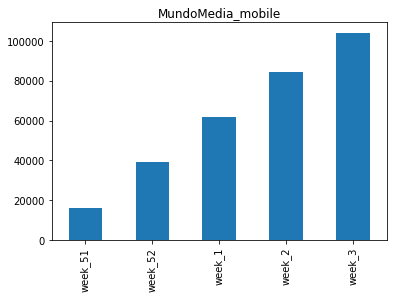

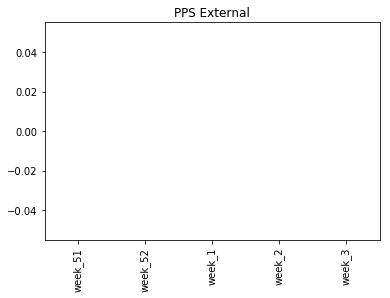

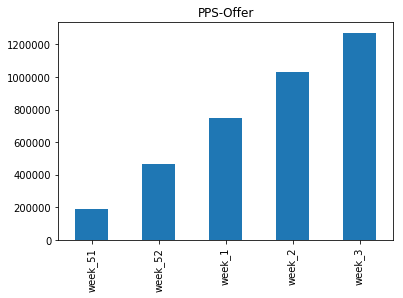

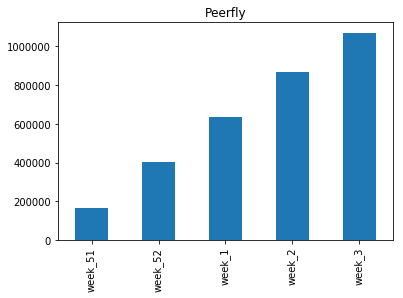

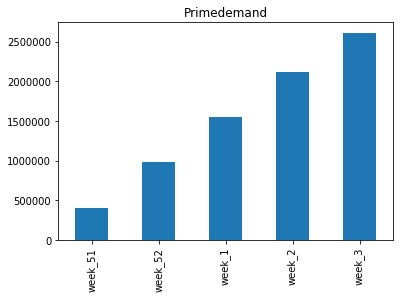

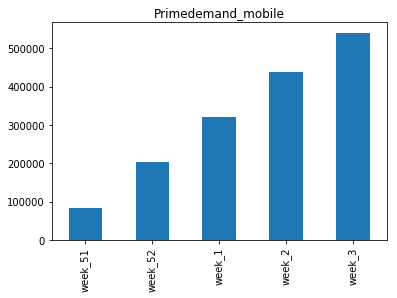

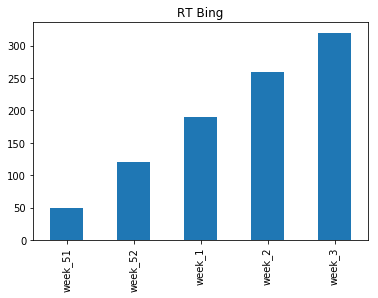

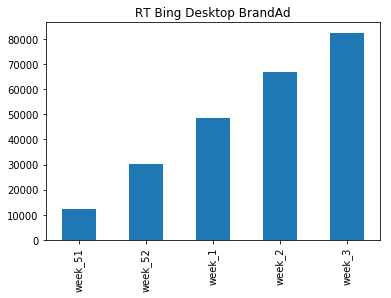

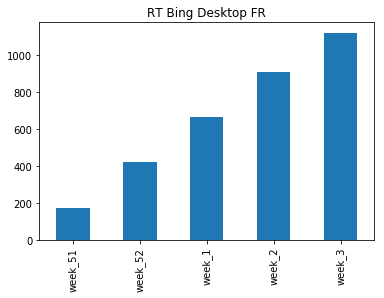

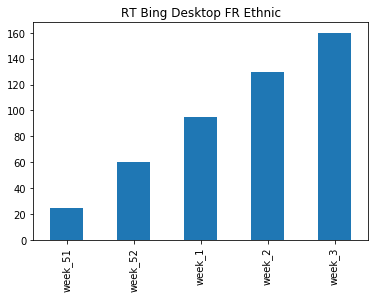

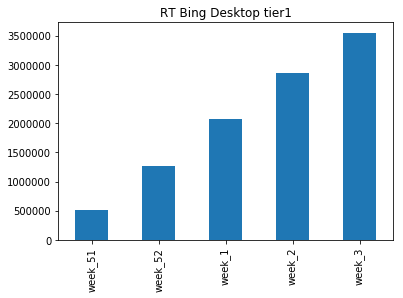

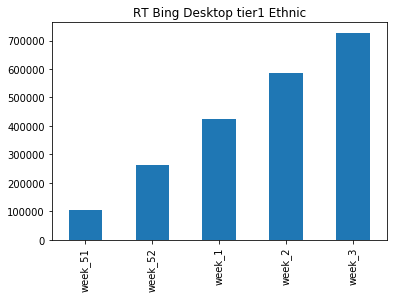

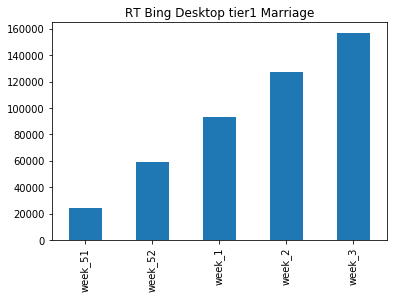

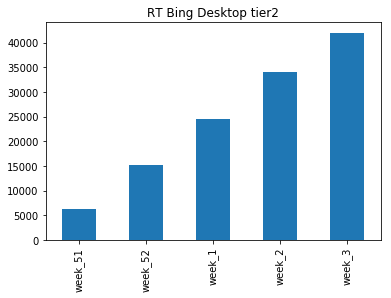

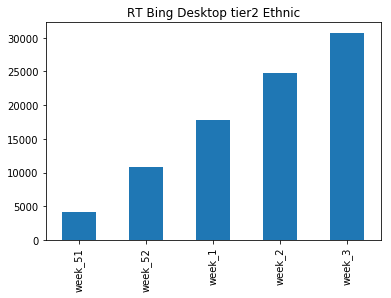

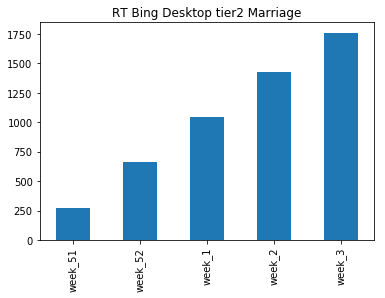

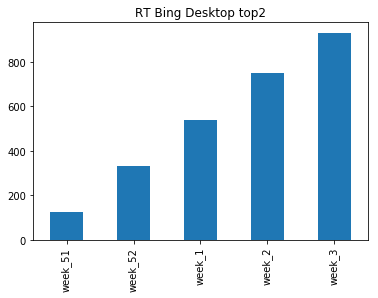

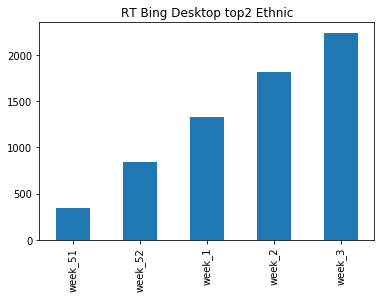

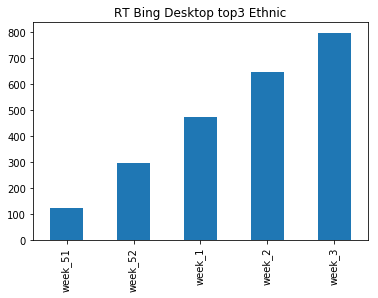

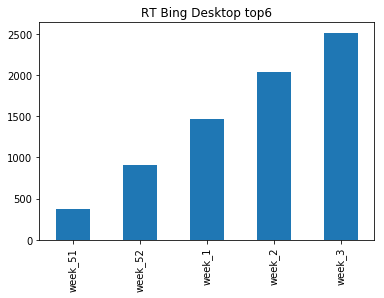

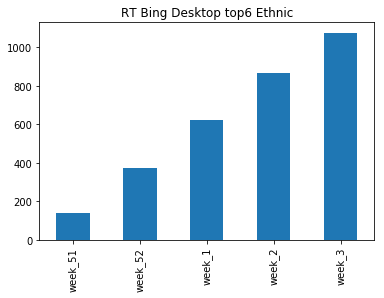

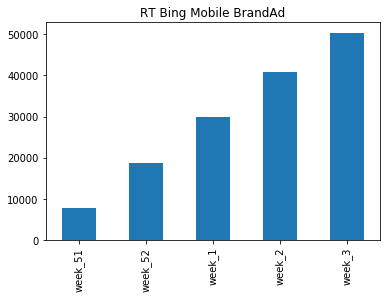

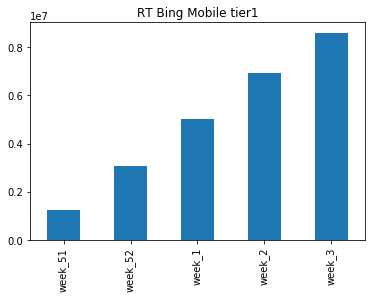

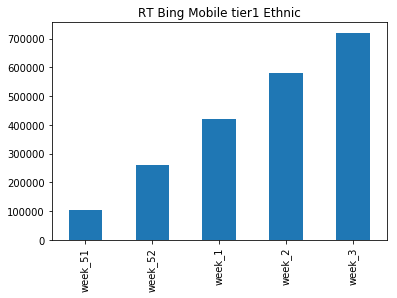

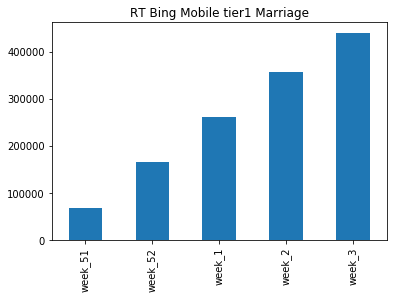

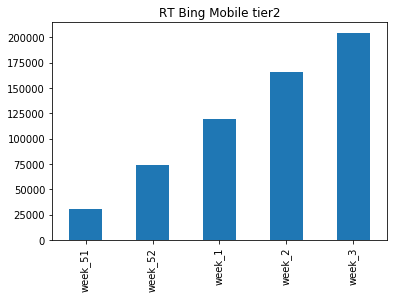

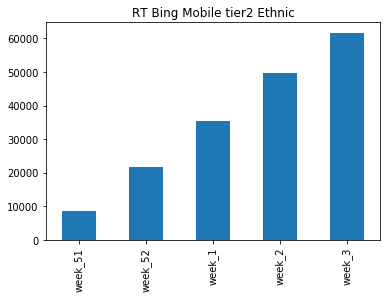

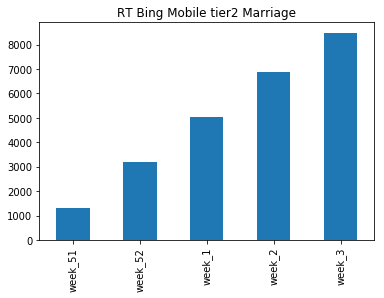

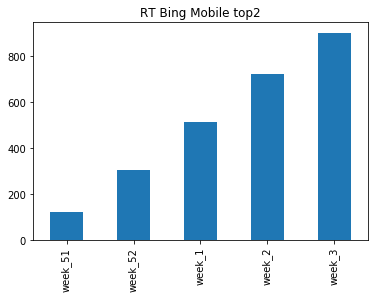

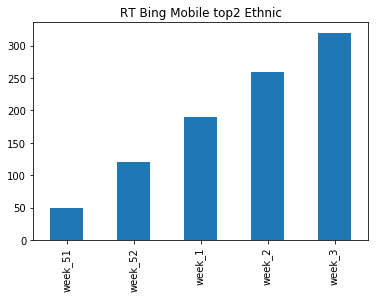

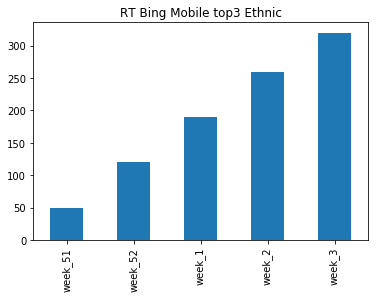

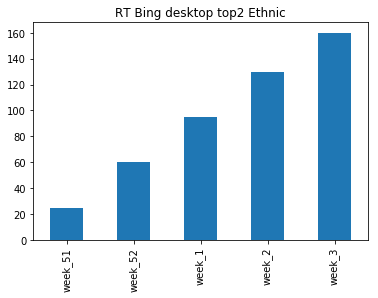

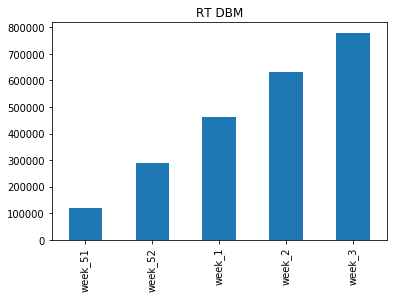

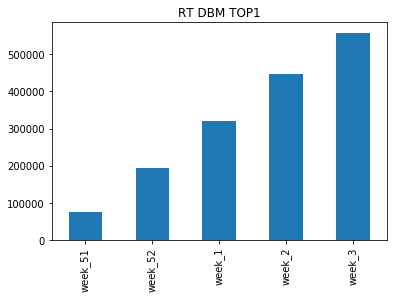

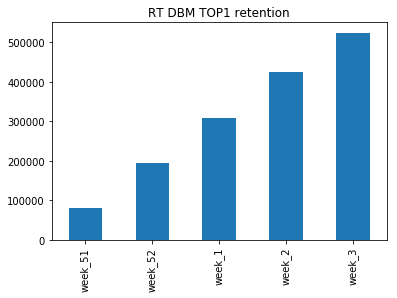

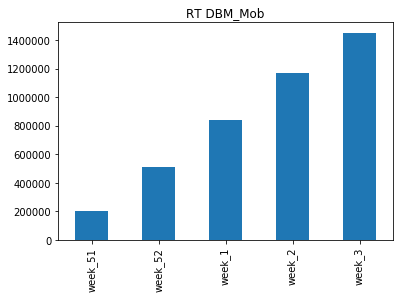

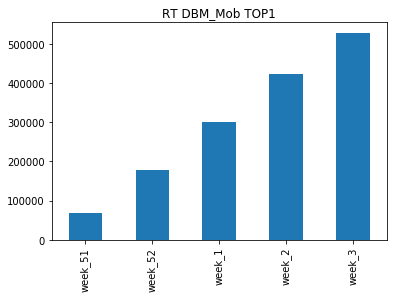

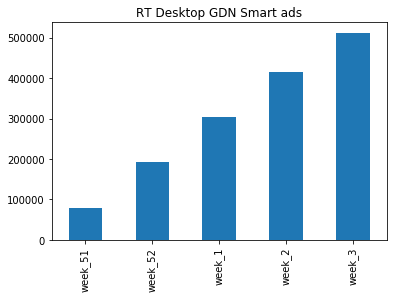

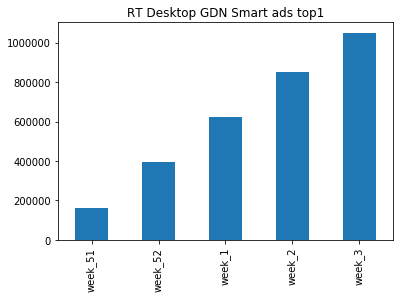

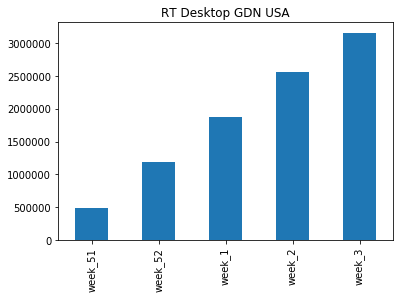

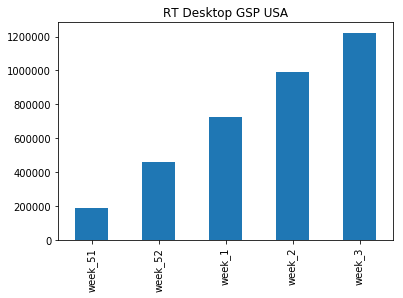

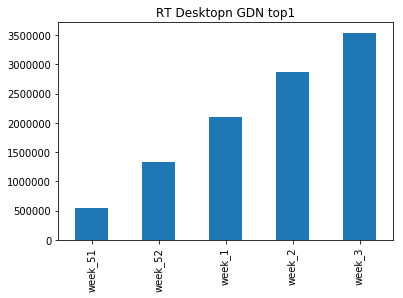

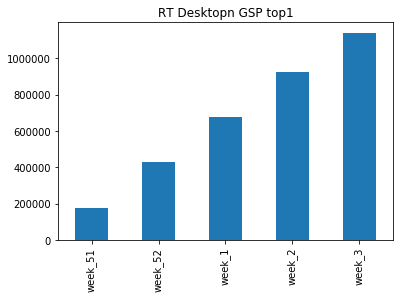

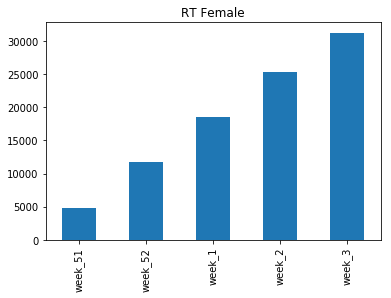

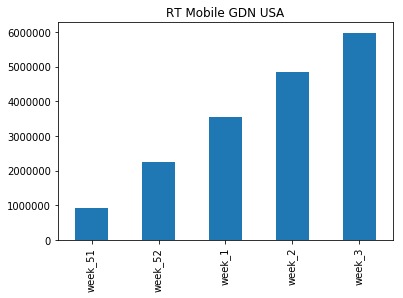

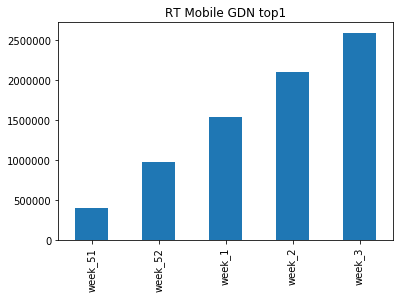

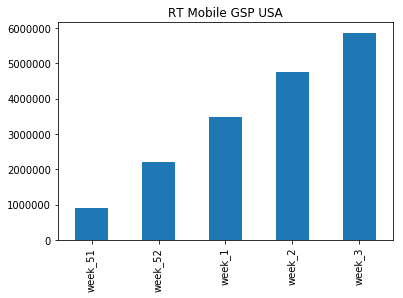

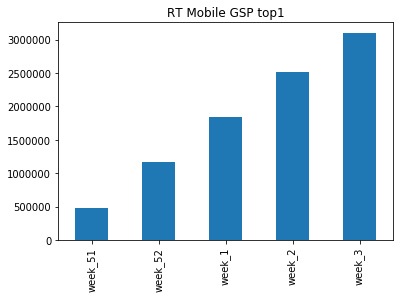

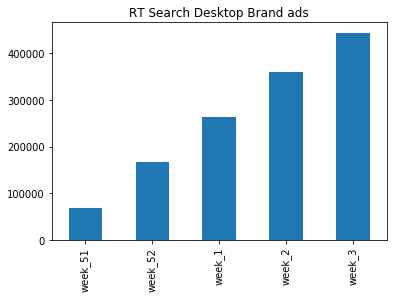

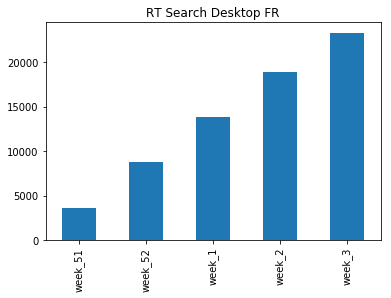

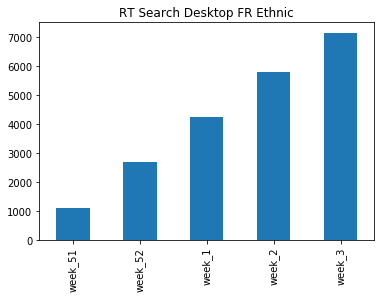

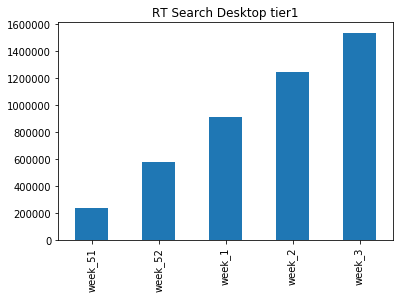

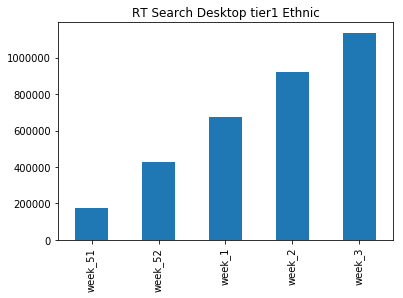

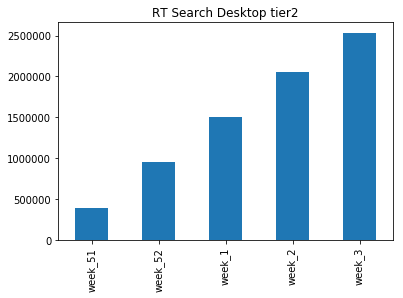

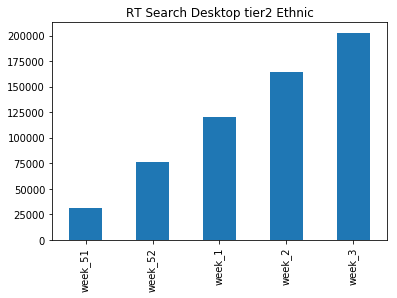

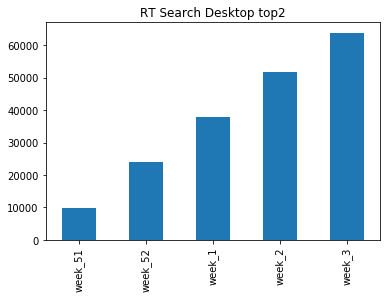

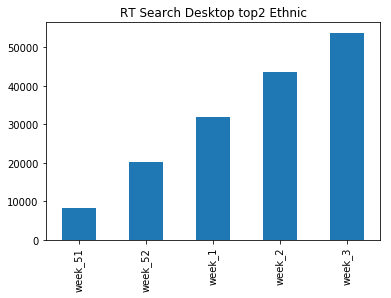

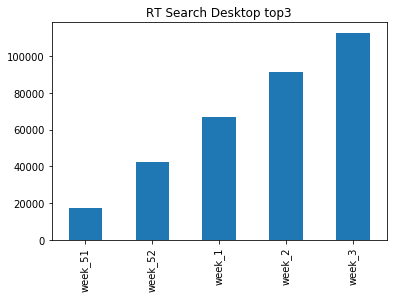

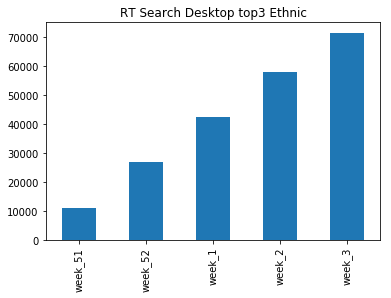

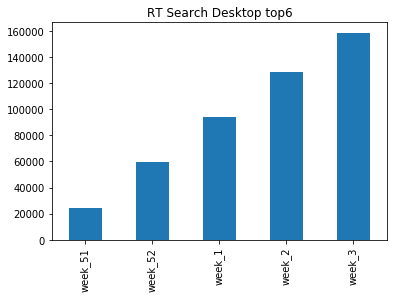

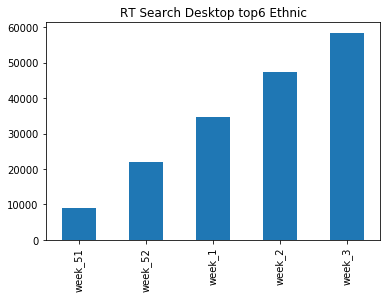

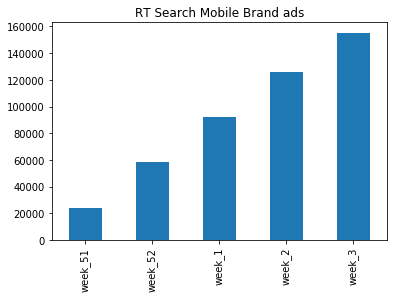

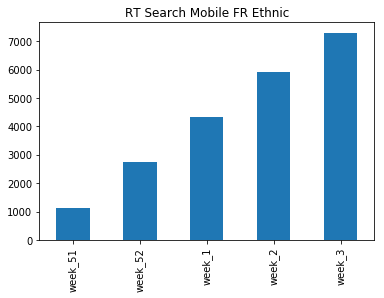

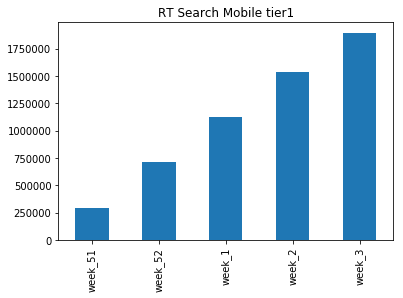

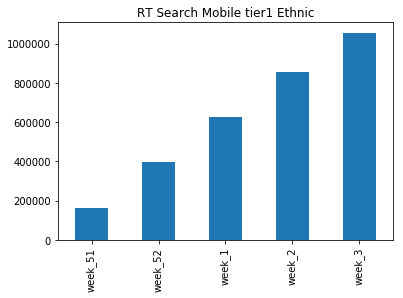

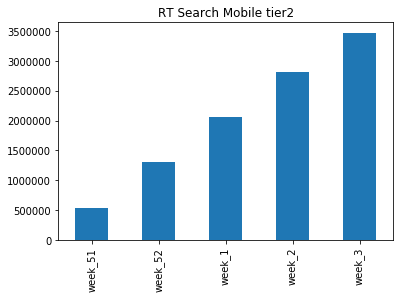

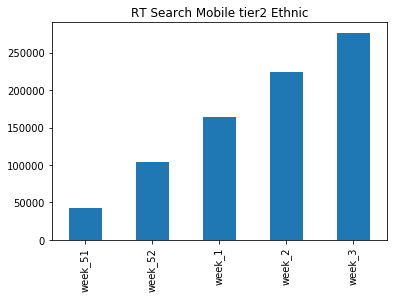

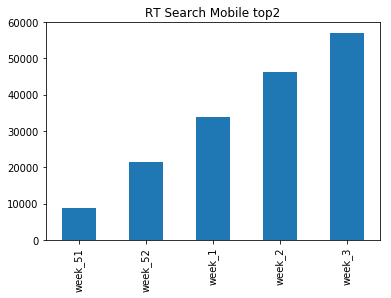

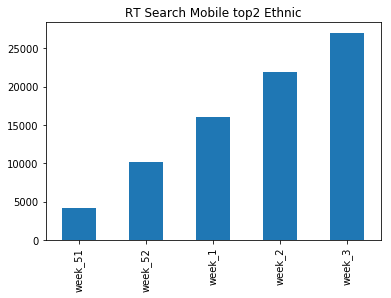

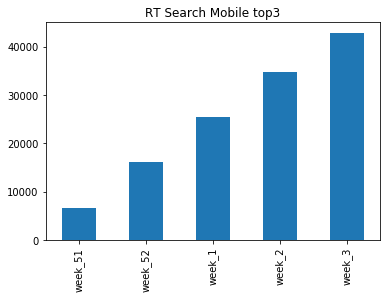

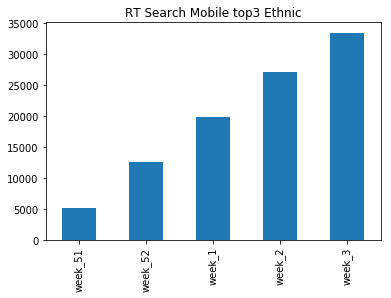

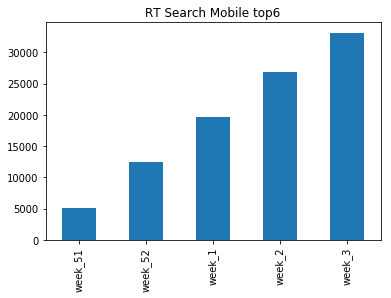

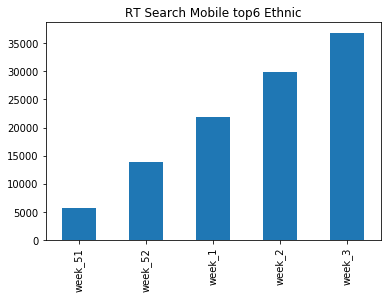

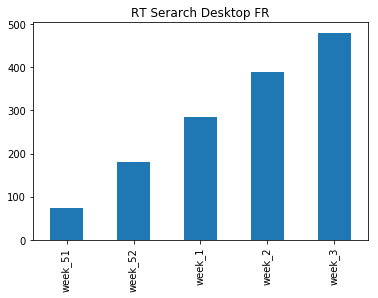

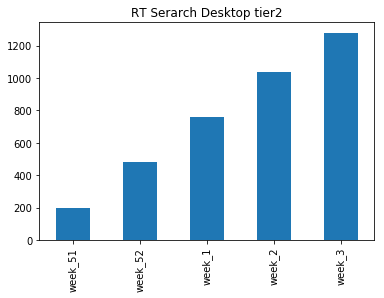

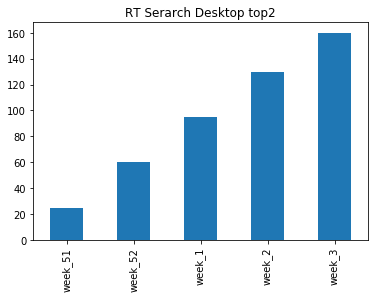

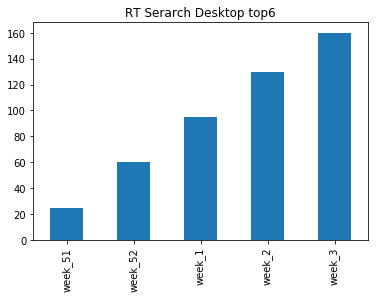

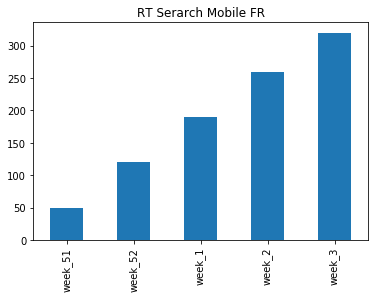

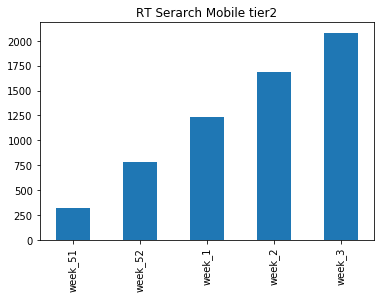

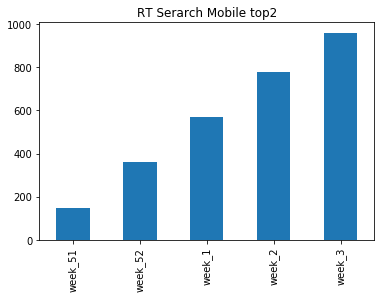

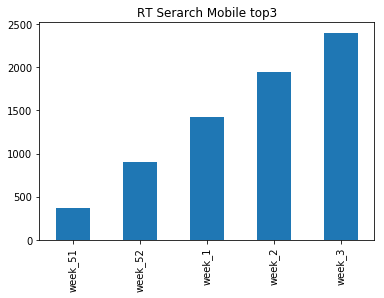

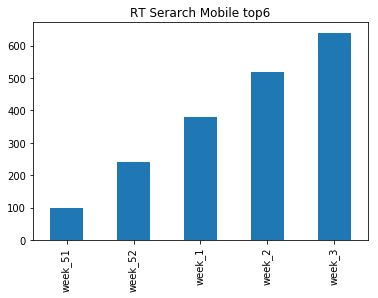

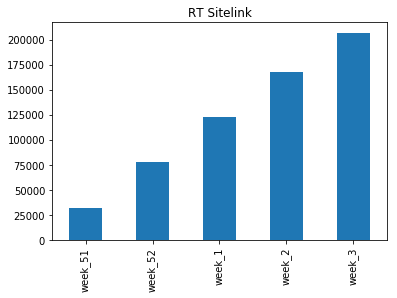

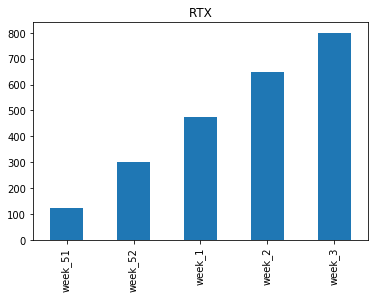

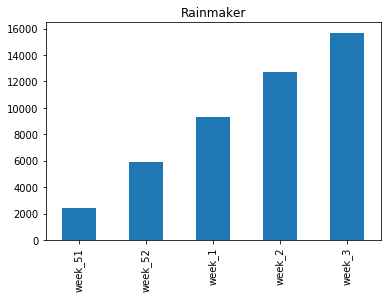

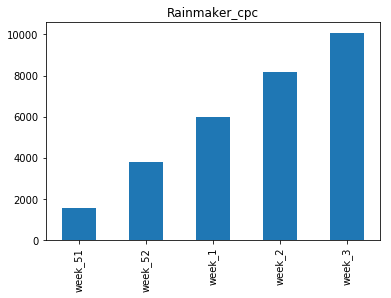

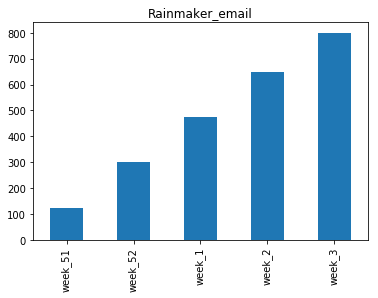

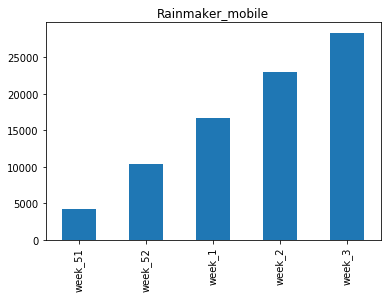

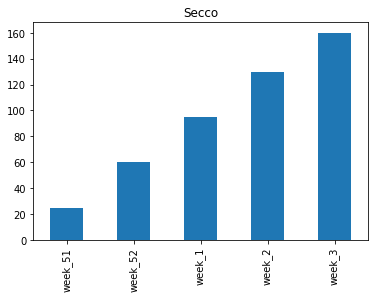

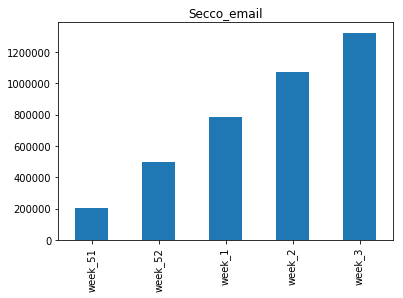

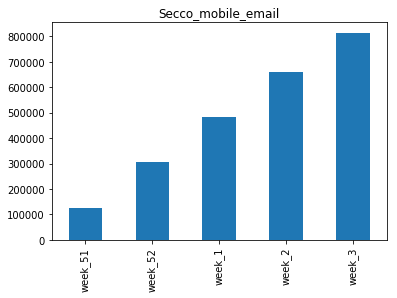

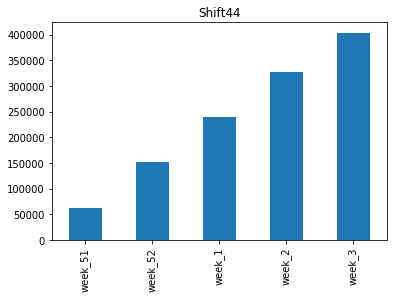

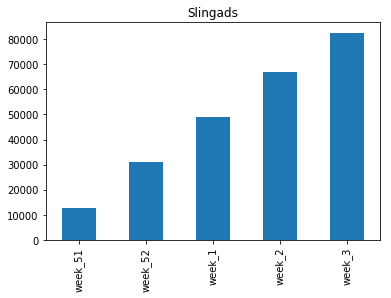

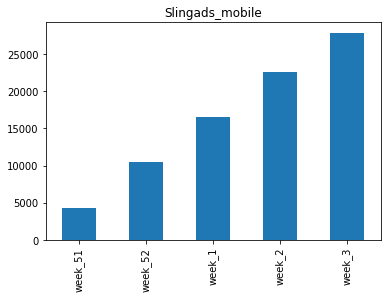

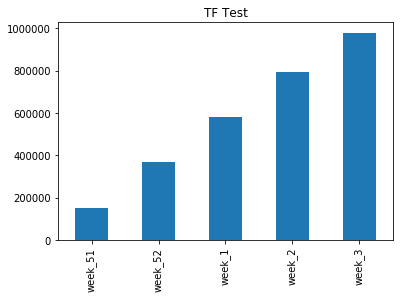

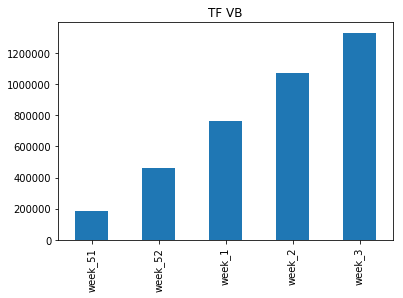

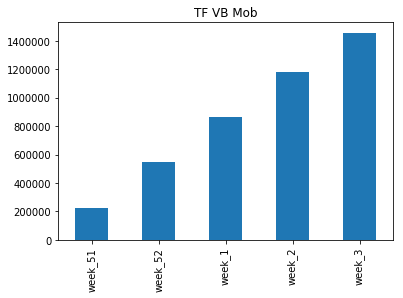

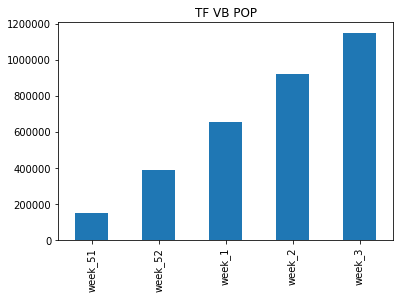

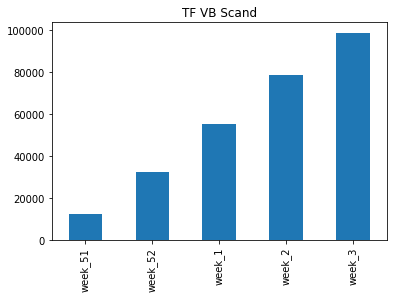

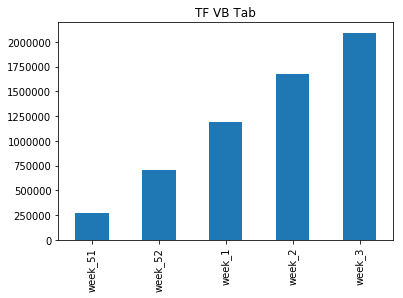

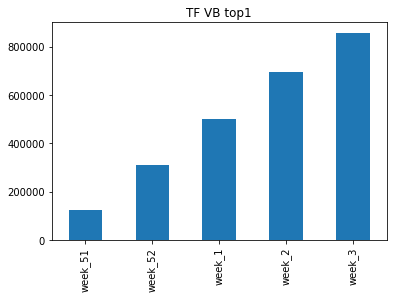

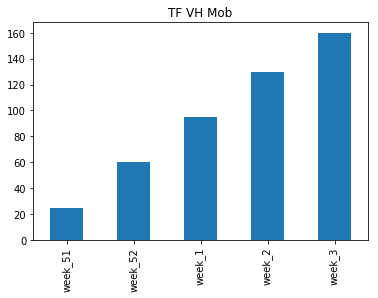

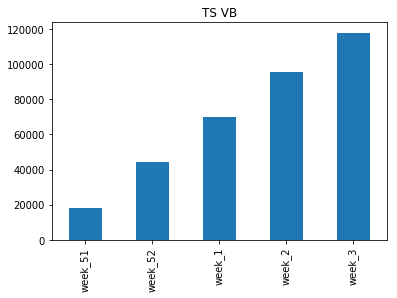

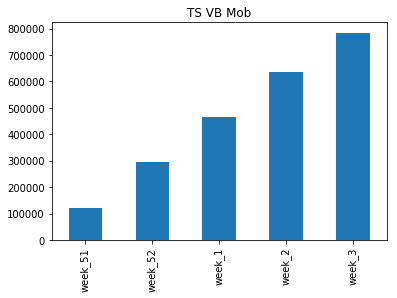

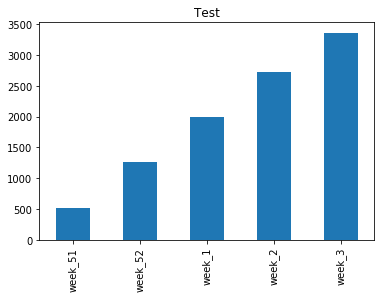

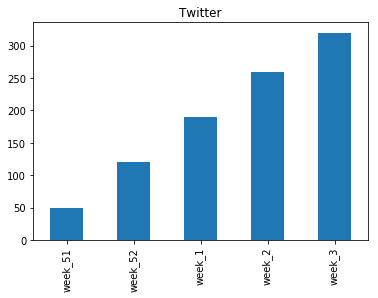

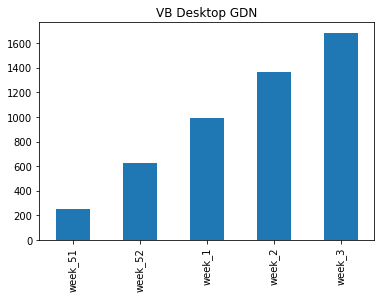

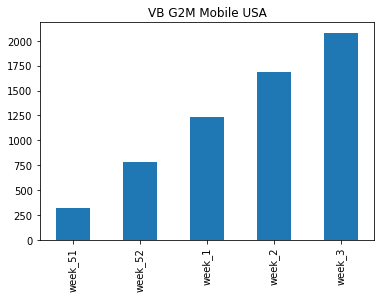

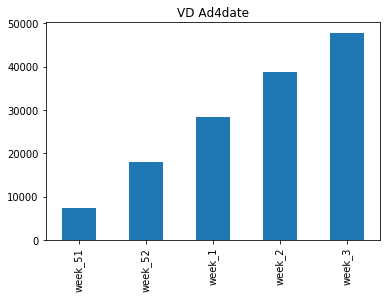

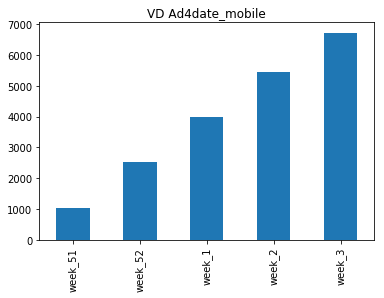

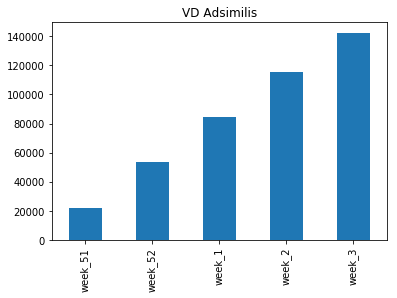

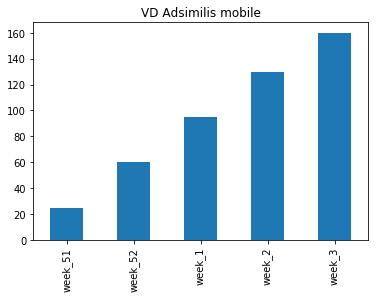

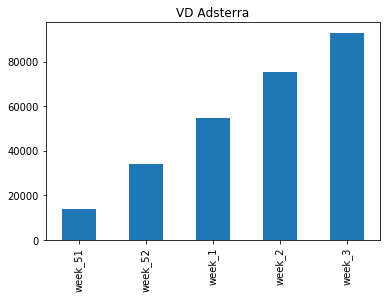

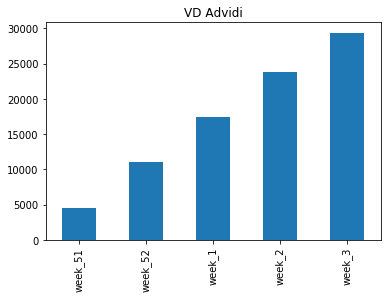

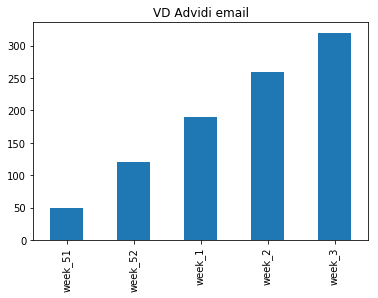

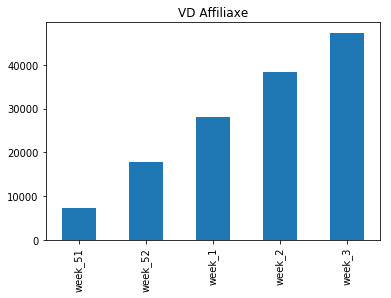

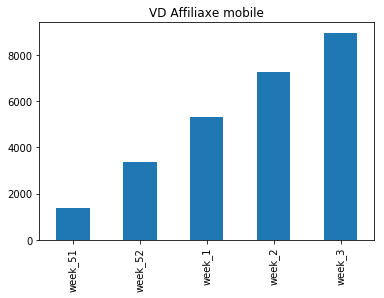

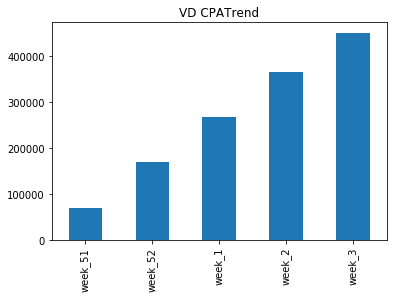

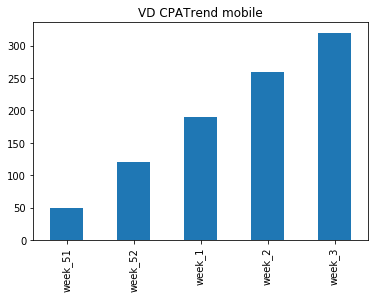

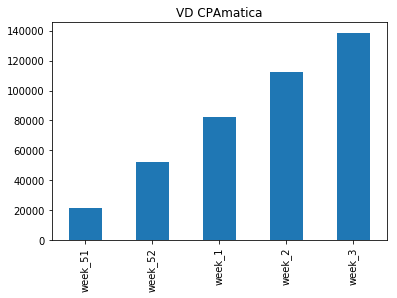

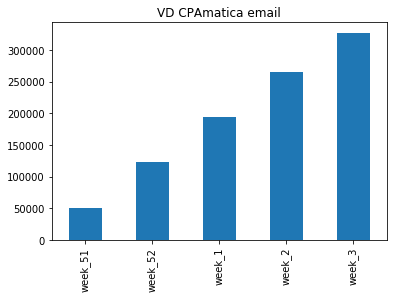

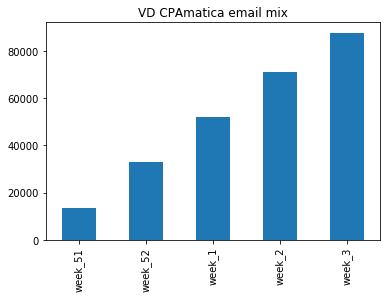

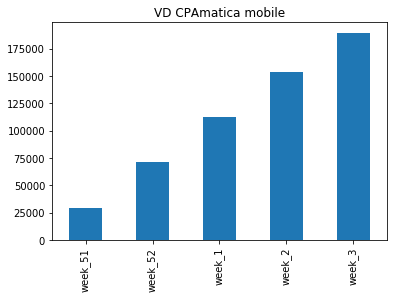

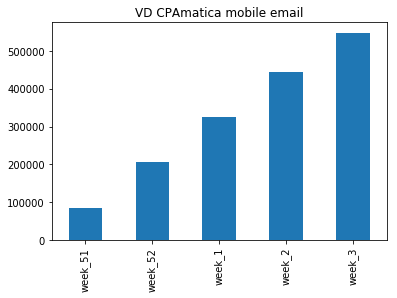

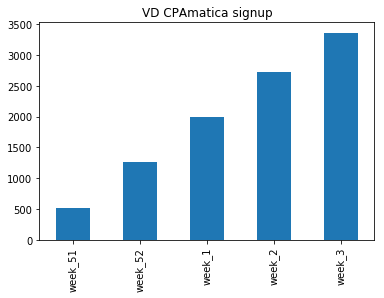

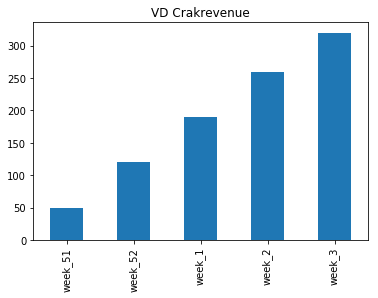

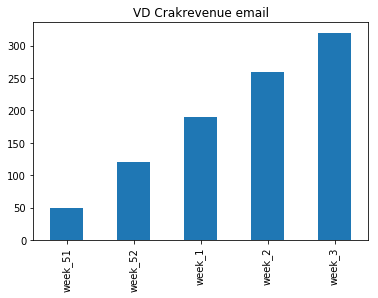

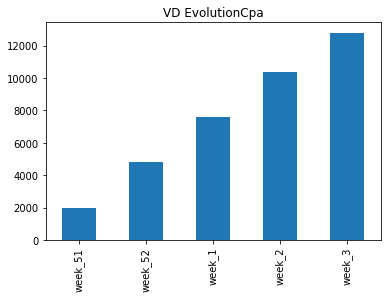

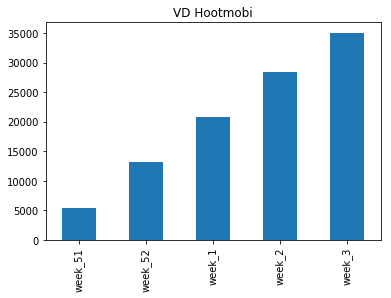

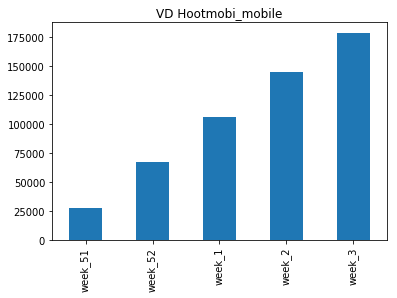

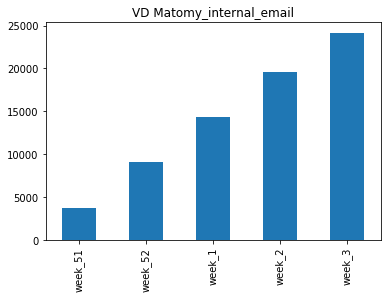

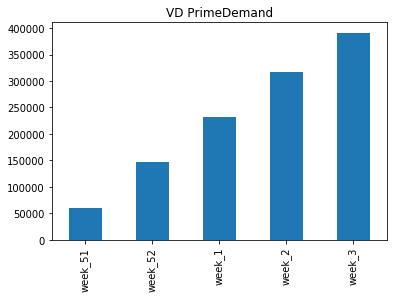

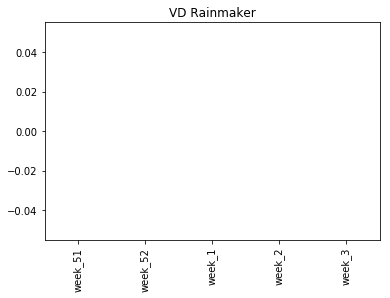

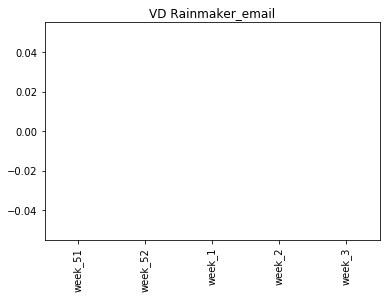

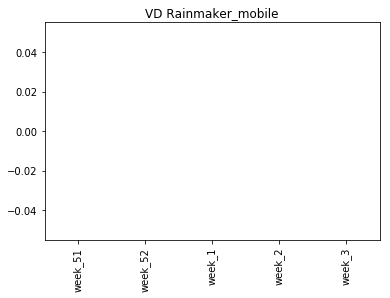

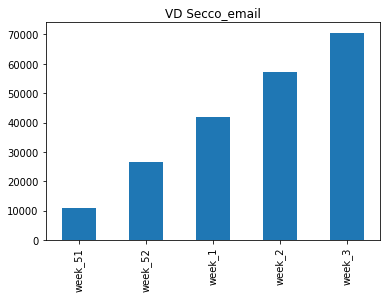

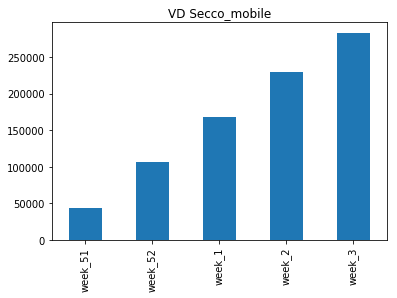

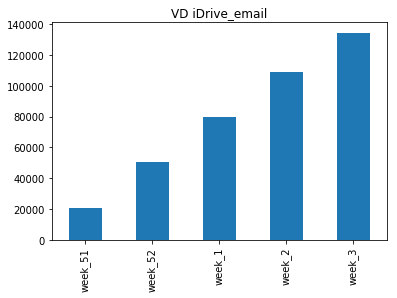

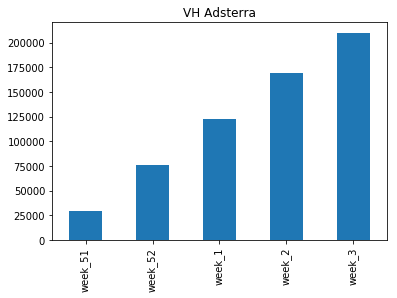

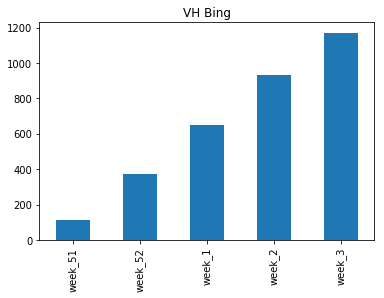

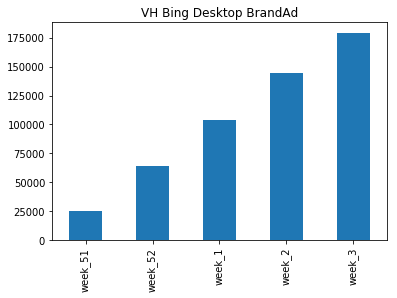

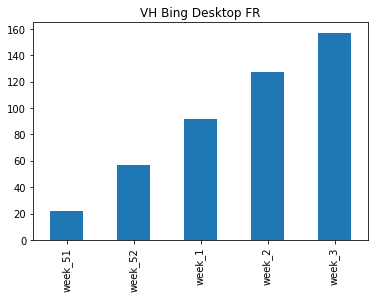

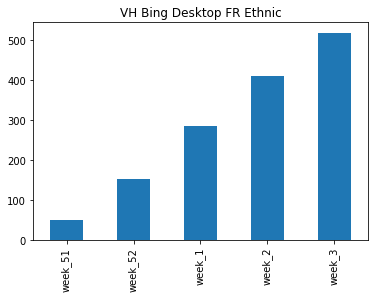

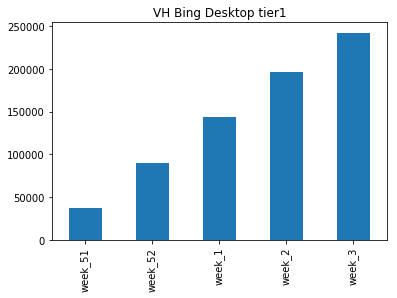

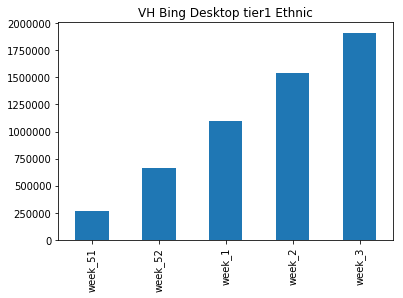

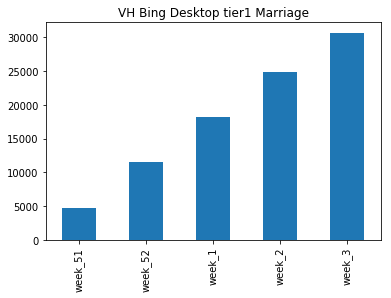

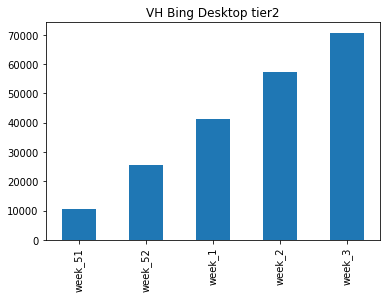

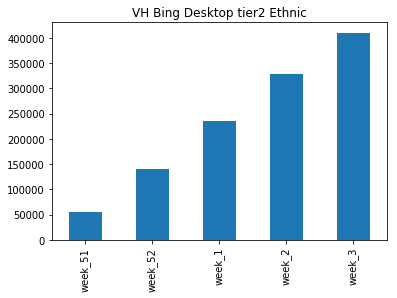

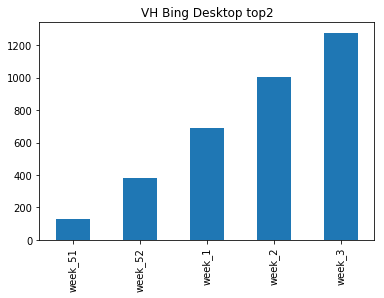

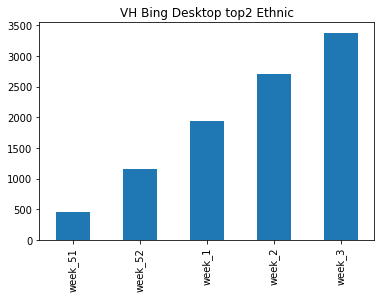

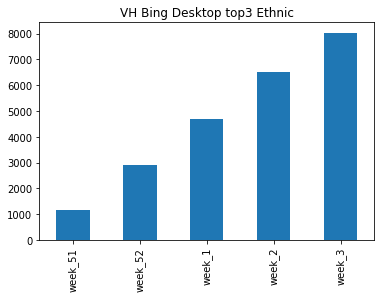

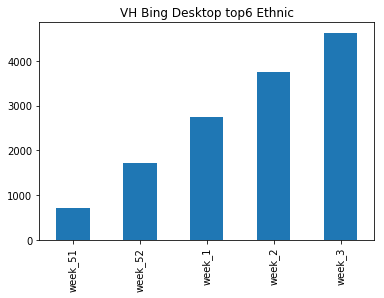

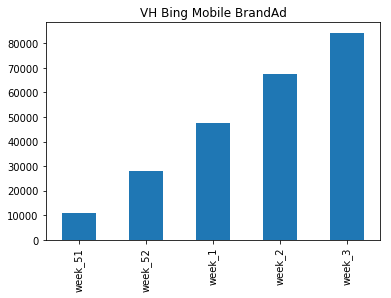

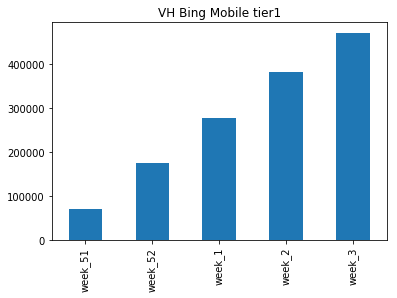

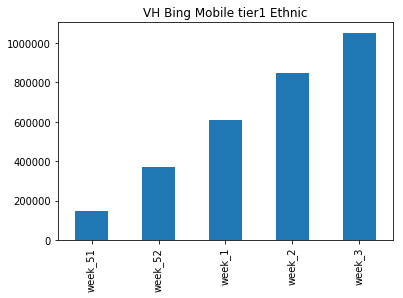

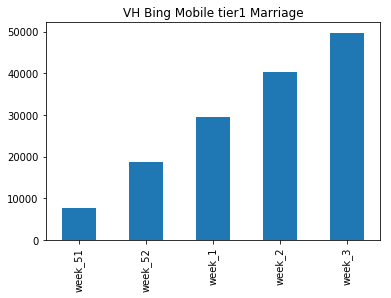

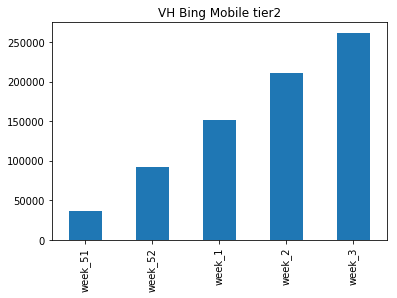

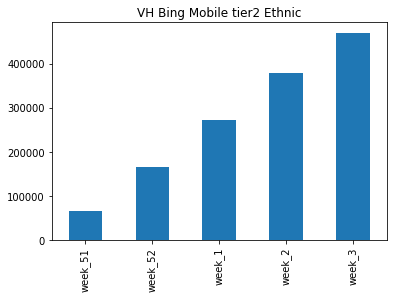

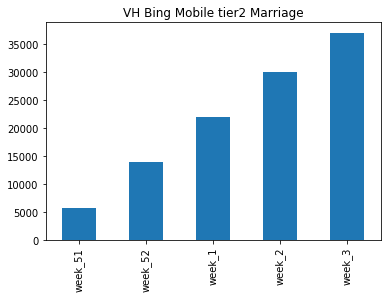

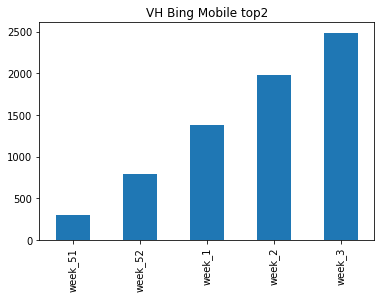

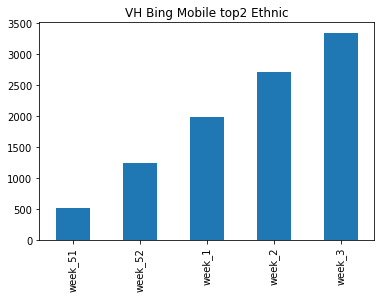

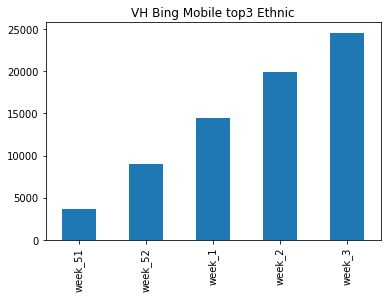

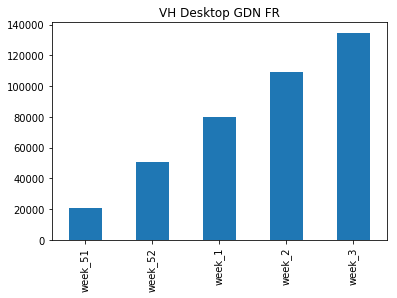

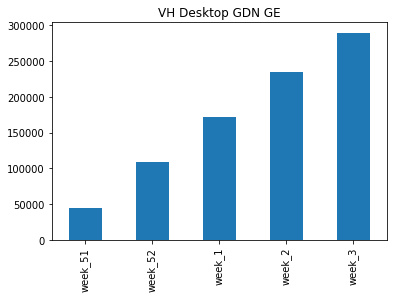

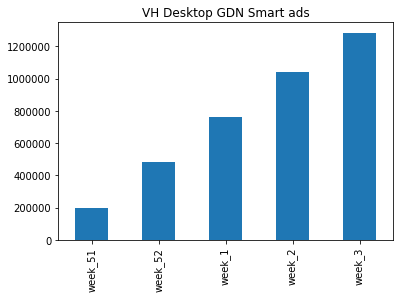

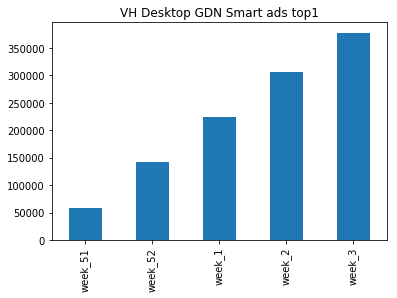

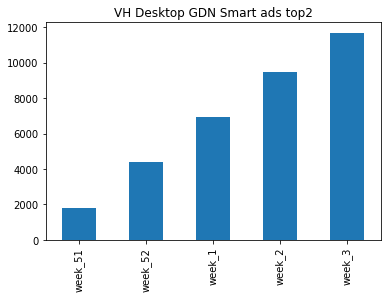

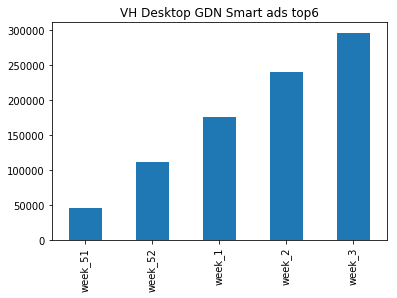

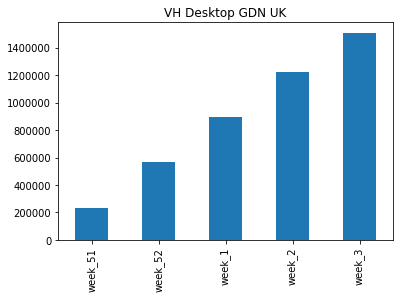

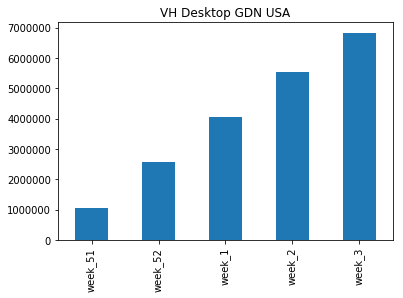

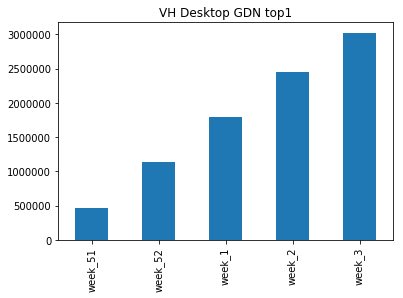

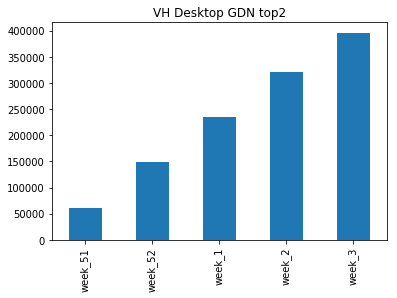

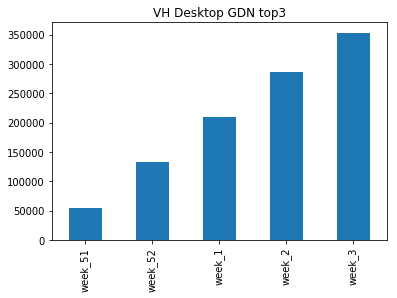

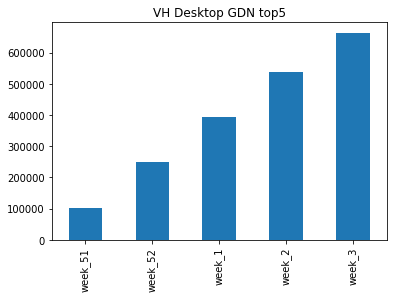

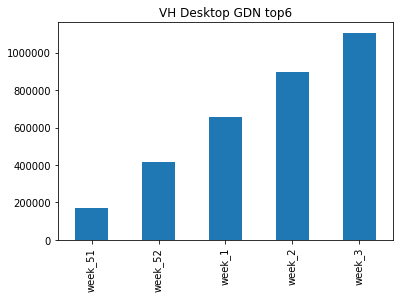

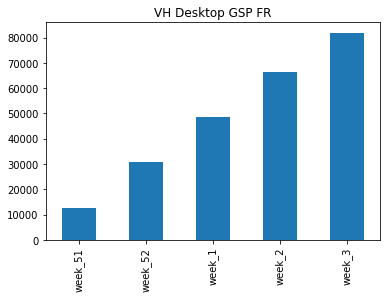

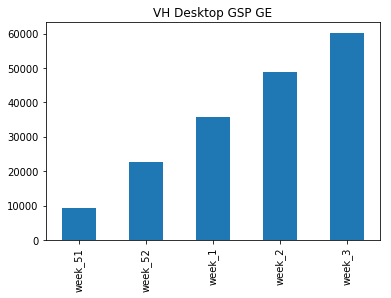

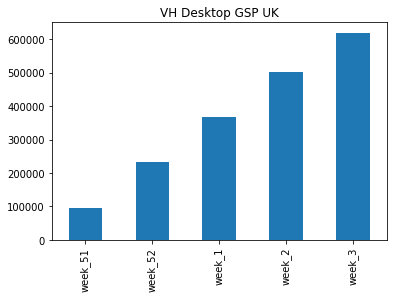

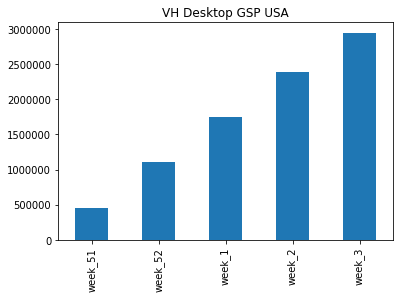

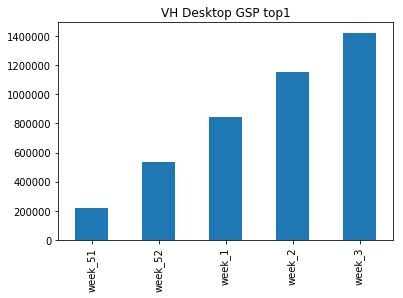

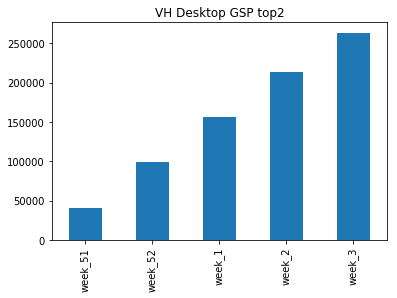

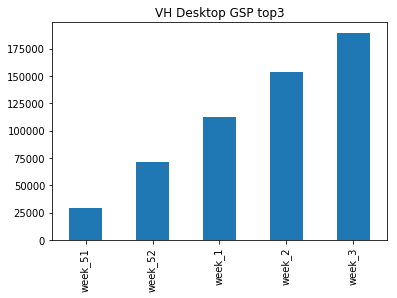

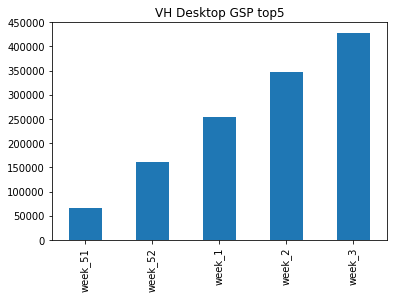

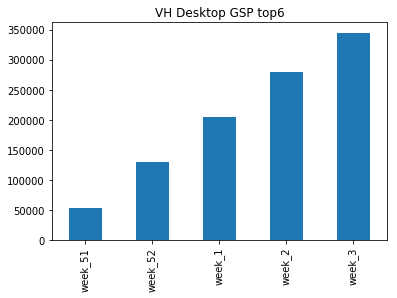

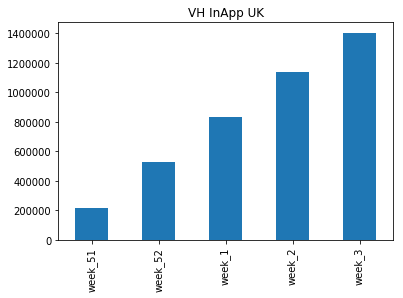

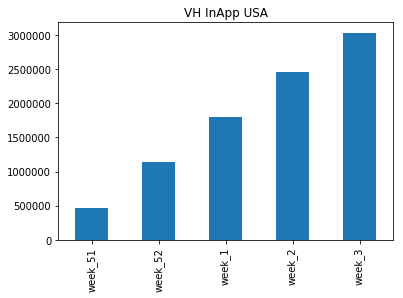

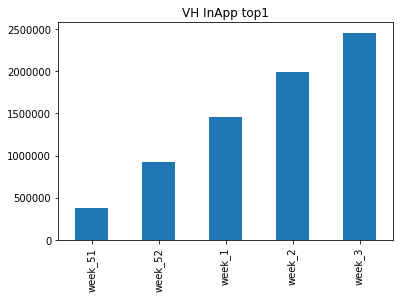

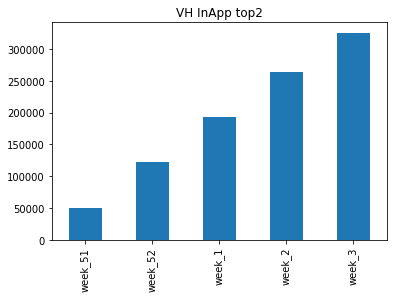

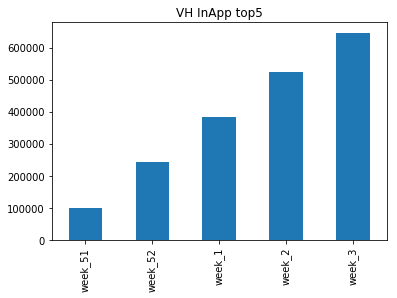

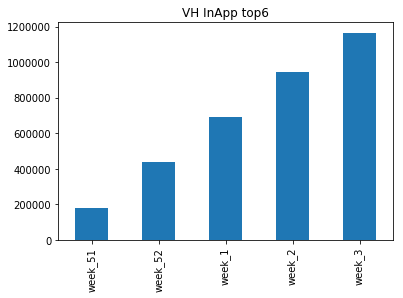

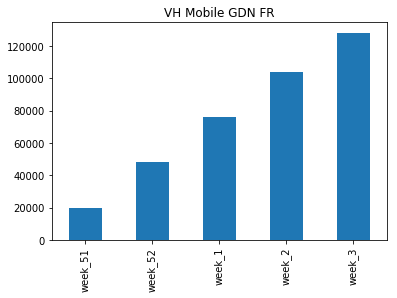

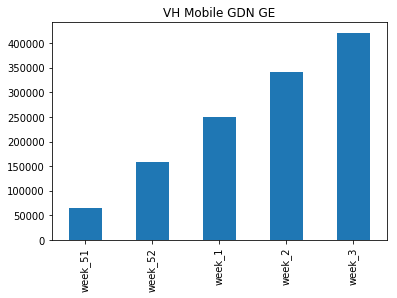

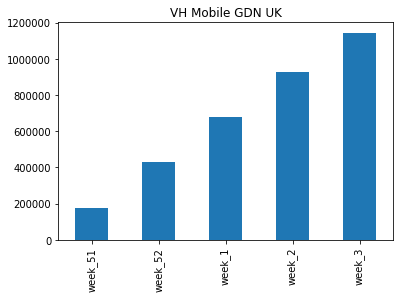

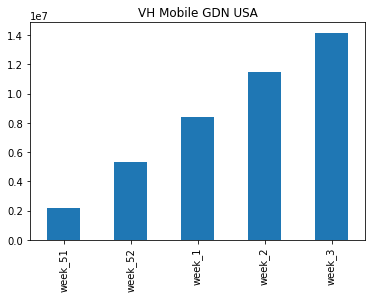

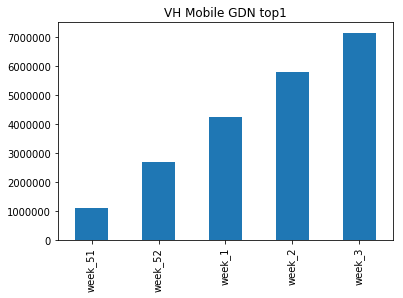

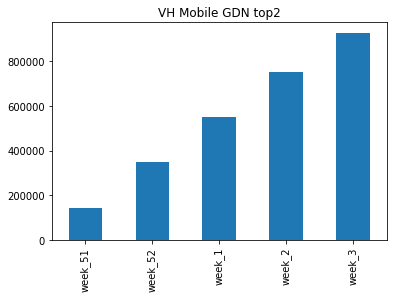

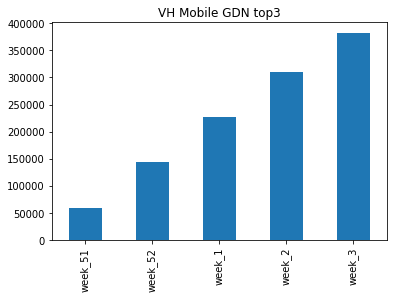

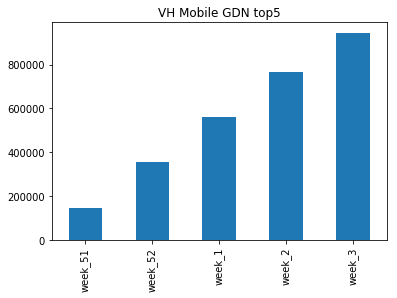

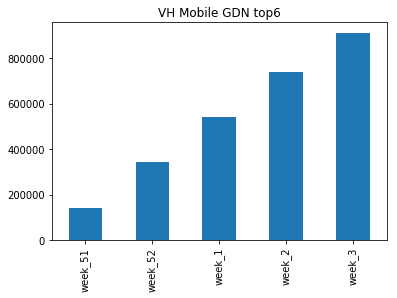

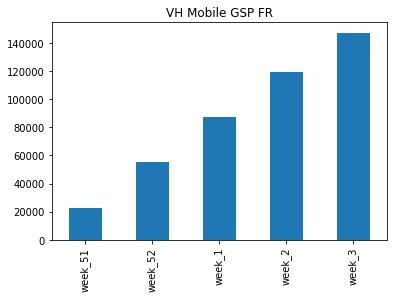

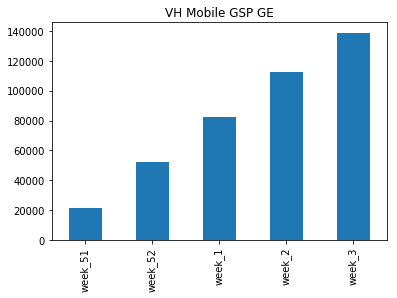

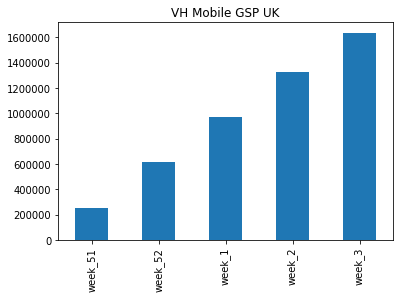

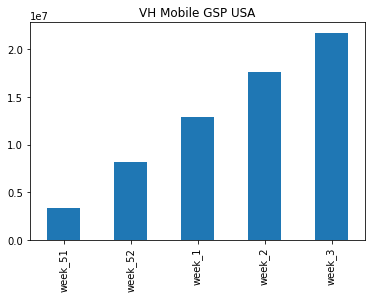

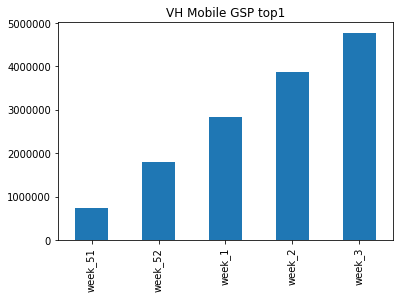

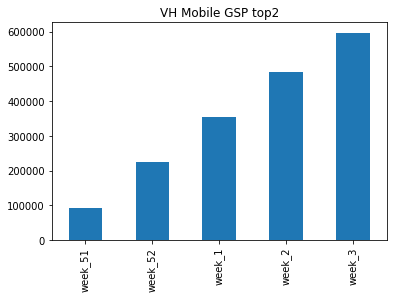

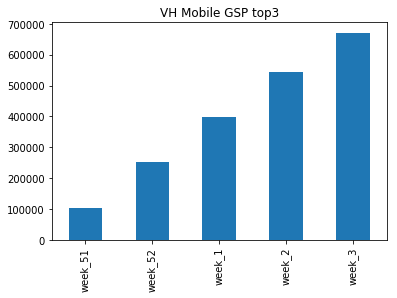

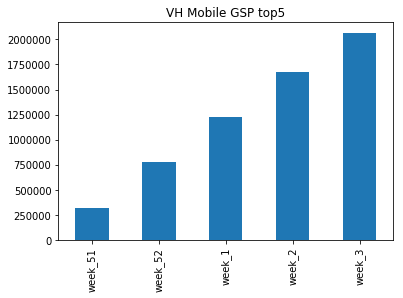

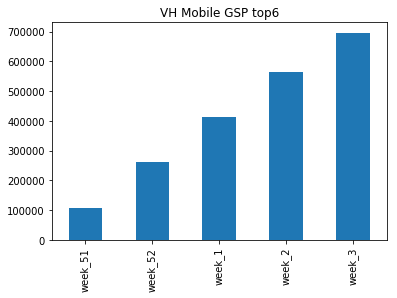

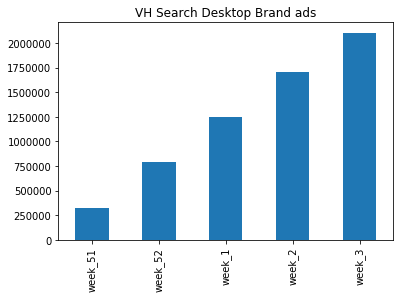

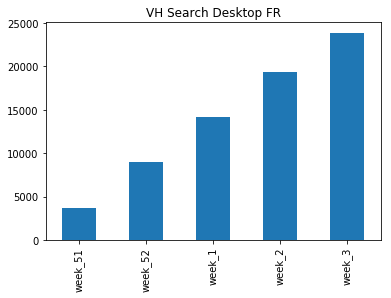

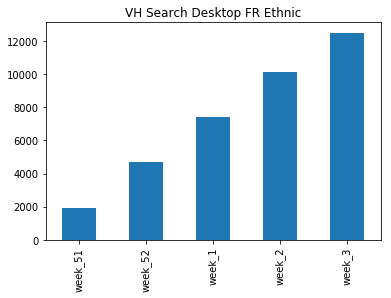

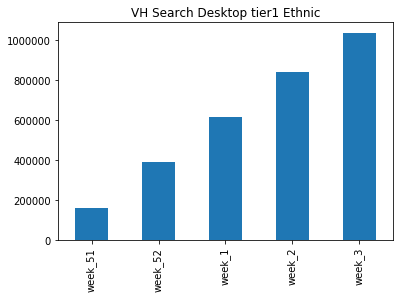

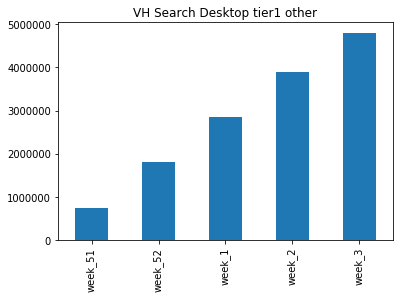

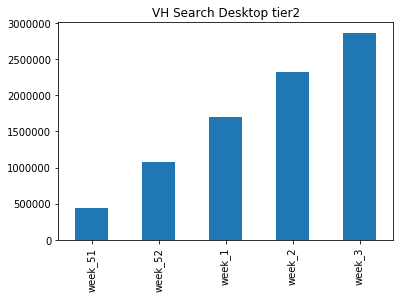

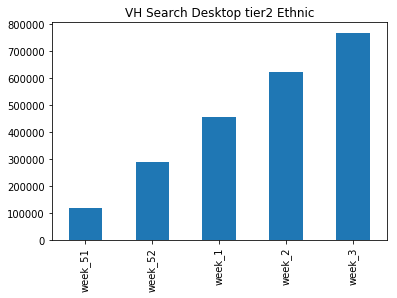

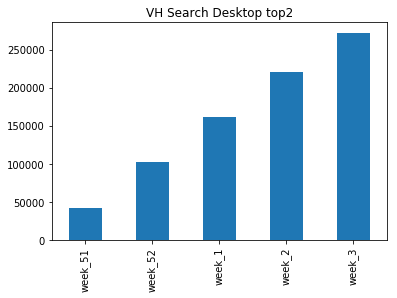

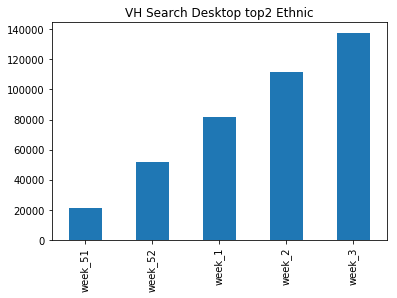

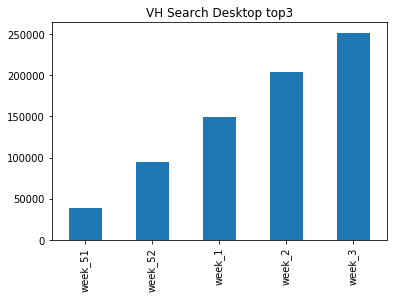

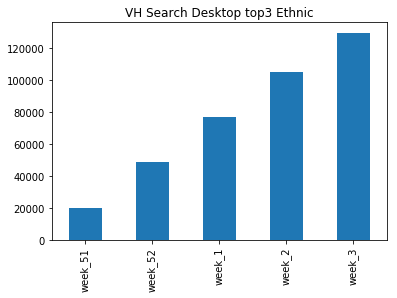

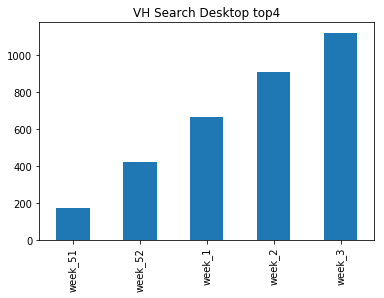

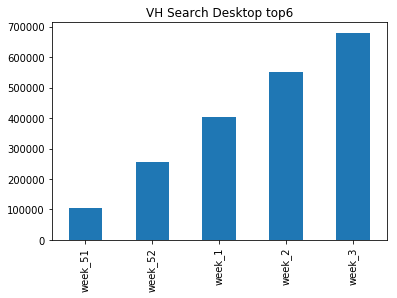

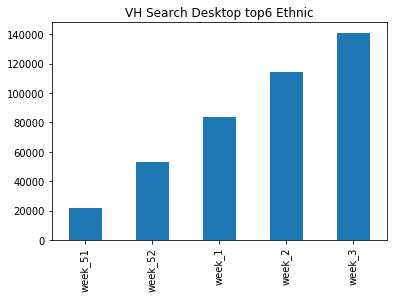

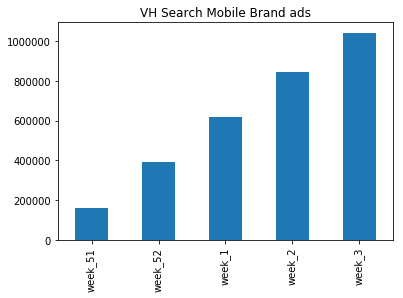

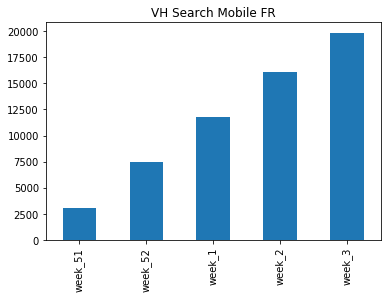

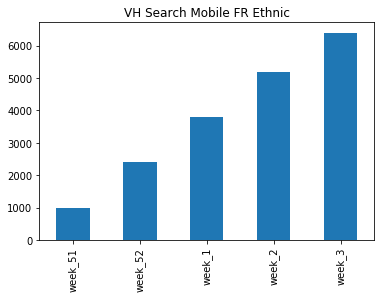

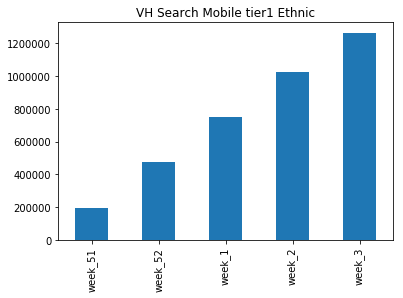

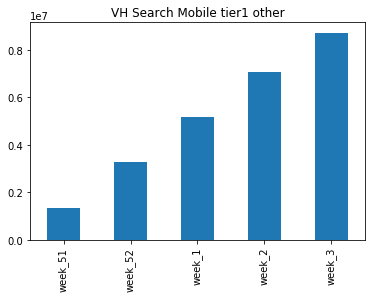

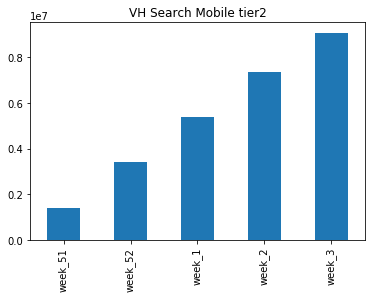

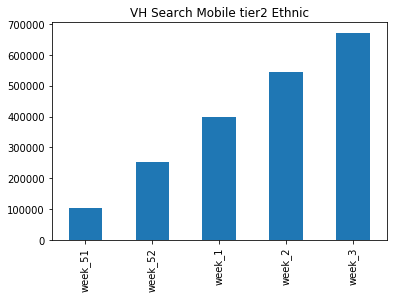

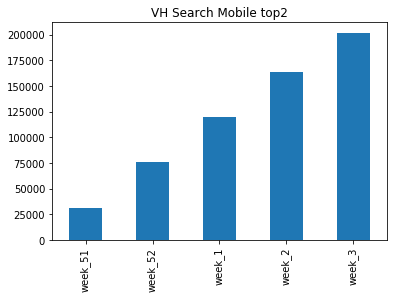

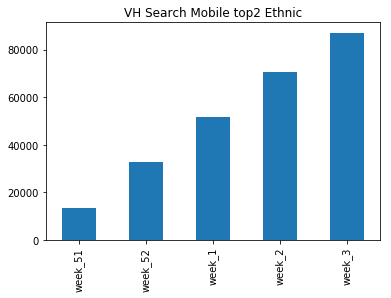

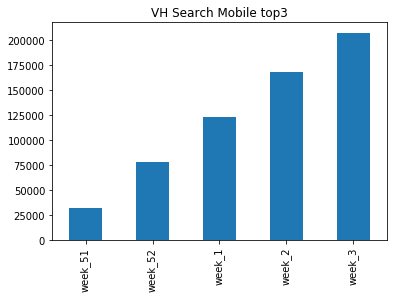

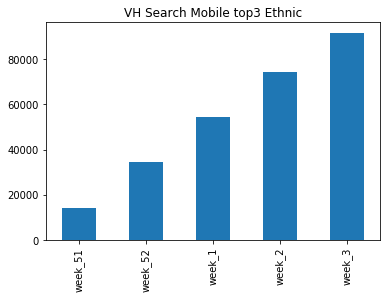

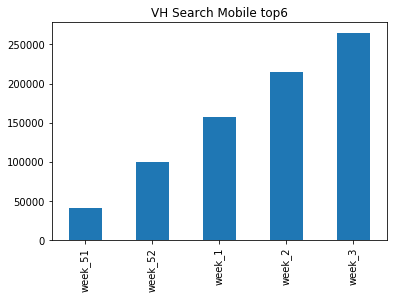

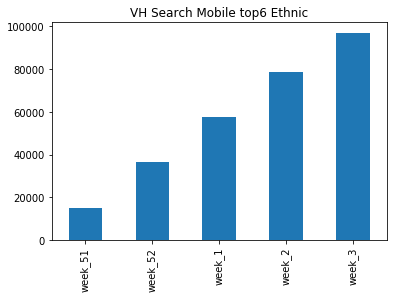

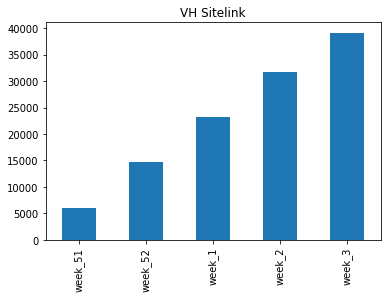

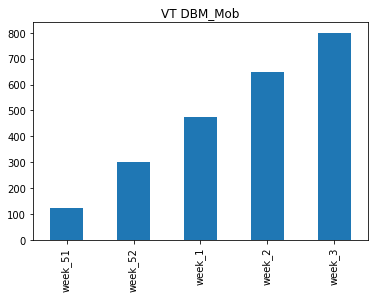

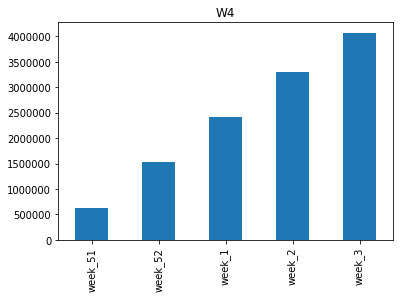

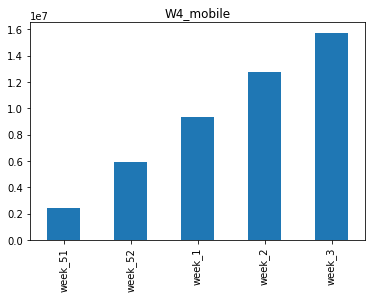

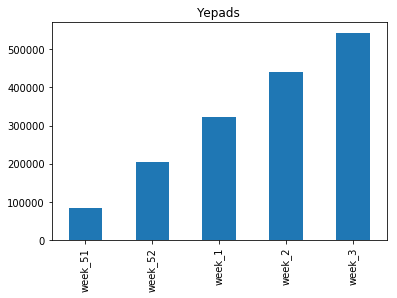

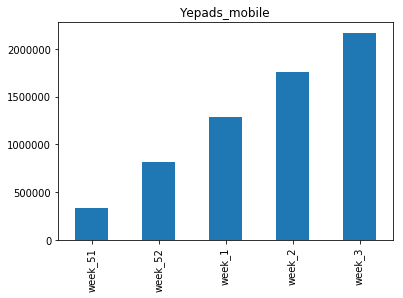

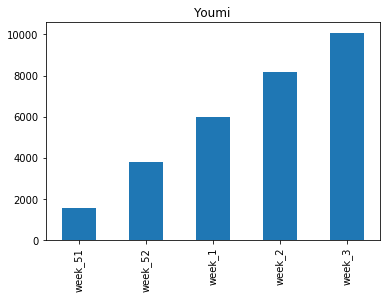

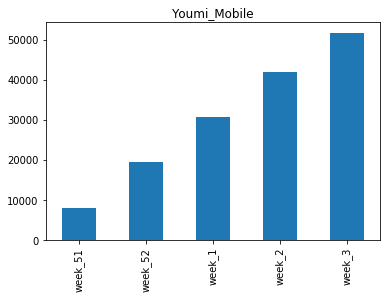

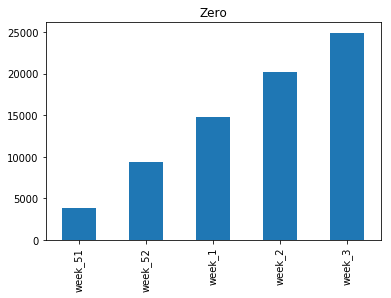

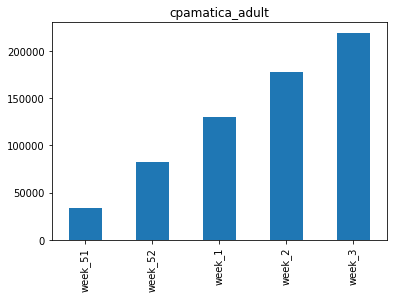

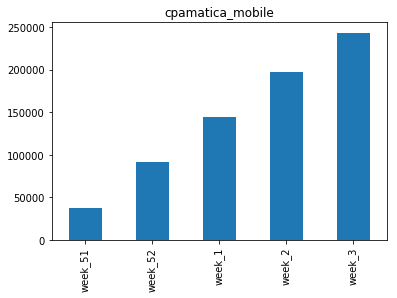

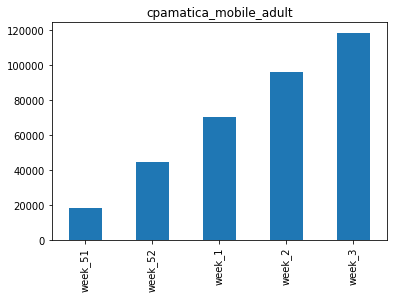

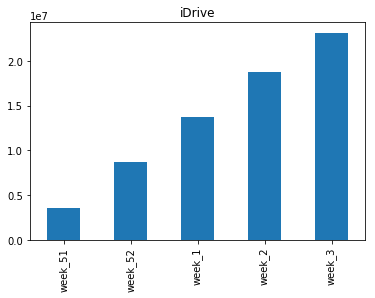

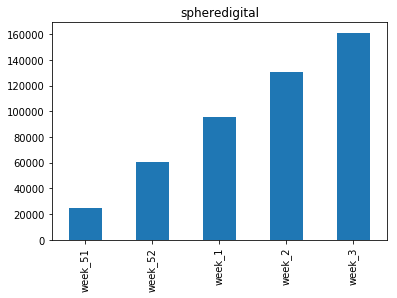

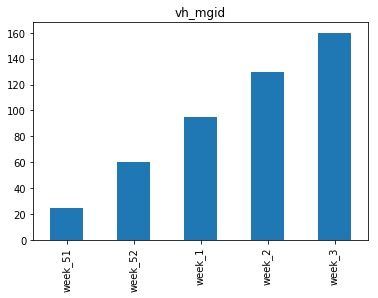

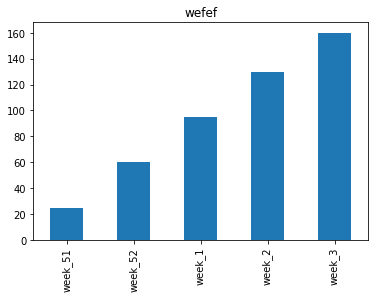

In [59]:
print_plot(week_letters.iloc[:,0], week_letters.iloc[:, :0:-1].cumsum(axis=1), len(week_letters) - 1)

Saving final DateFrame

In [60]:
week_letters_path = output_path + '\\week_letters.csv'
week_letters.to_csv(week_letters_path)